<a href="https://colab.research.google.com/github/skytecat/PredictingRoadAccidentRisk/blob/main/road_accident_risk_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Road_risk/train.csv')

In [3]:
data

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [4]:
data = data.drop('id', axis=1)

In [5]:
data['road_signs_present'] = data['road_signs_present'].astype(int)
data['public_road'] = data['public_road'].astype(int)
data['holiday'] = data['holiday'].astype(int)
data['school_season'] = data['school_season'].astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   road_type               517754 non-null  object 
 1   num_lanes               517754 non-null  int64  
 2   curvature               517754 non-null  float64
 3   speed_limit             517754 non-null  int64  
 4   lighting                517754 non-null  object 
 5   weather                 517754 non-null  object 
 6   road_signs_present      517754 non-null  int64  
 7   public_road             517754 non-null  int64  
 8   time_of_day             517754 non-null  object 
 9   holiday                 517754 non-null  int64  
 10  school_season           517754 non-null  int64  
 11  num_reported_accidents  517754 non-null  int64  
 12  accident_risk           517754 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 51.4+ MB


In [7]:
data

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,0,1,afternoon,0,1,1,0.13
1,urban,4,0.99,35,daylight,clear,1,0,evening,1,1,0,0.35
2,rural,4,0.63,70,dim,clear,0,1,morning,1,0,2,0.30
3,highway,4,0.07,35,dim,rainy,1,1,morning,0,0,1,0.21
4,rural,1,0.58,60,daylight,foggy,0,0,evening,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,1,1,afternoon,0,0,2,0.32
517750,rural,4,0.47,35,daylight,rainy,1,1,morning,0,0,1,0.26
517751,urban,4,0.62,25,daylight,foggy,0,0,afternoon,0,1,0,0.19
517752,highway,3,0.63,25,night,clear,1,0,afternoon,1,1,3,0.51


## Анализ численных атрибутов

In [8]:
numerical_data = data.select_dtypes(include=['number'])

In [9]:
numerical_data.describe()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,2.491511,0.488719,46.112575,0.499204,0.502256,0.503498,0.497514,1.187970,0.352377
std,1.120434,0.272563,15.788521,0.500000,0.499995,0.499988,0.499994,0.895961,0.166417
min,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.260000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.230000
50%,2.000000,0.510000,45.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.340000
75%,3.000000,0.710000,60.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.460000
max,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [10]:
numerical_data.isnull().sum()

,0
num_lanes,0
curvature,0
speed_limit,0
road_signs_present,0
public_road,0
holiday,0
school_season,0
num_reported_accidents,0
accident_risk,0


In [11]:
numerical_data

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk
0,2,0.06,35,0,1,0,1,1,0.13
1,4,0.99,35,1,0,1,1,0,0.35
2,4,0.63,70,0,1,1,0,2,0.30
3,4,0.07,35,1,1,0,0,1,0.21
4,1,0.58,60,0,0,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...
517749,4,0.10,70,1,1,0,0,2,0.32
517750,4,0.47,35,1,1,0,0,1,0.26
517751,4,0.62,25,0,0,0,1,0,0.19
517752,3,0.63,25,1,0,1,1,3,0.51


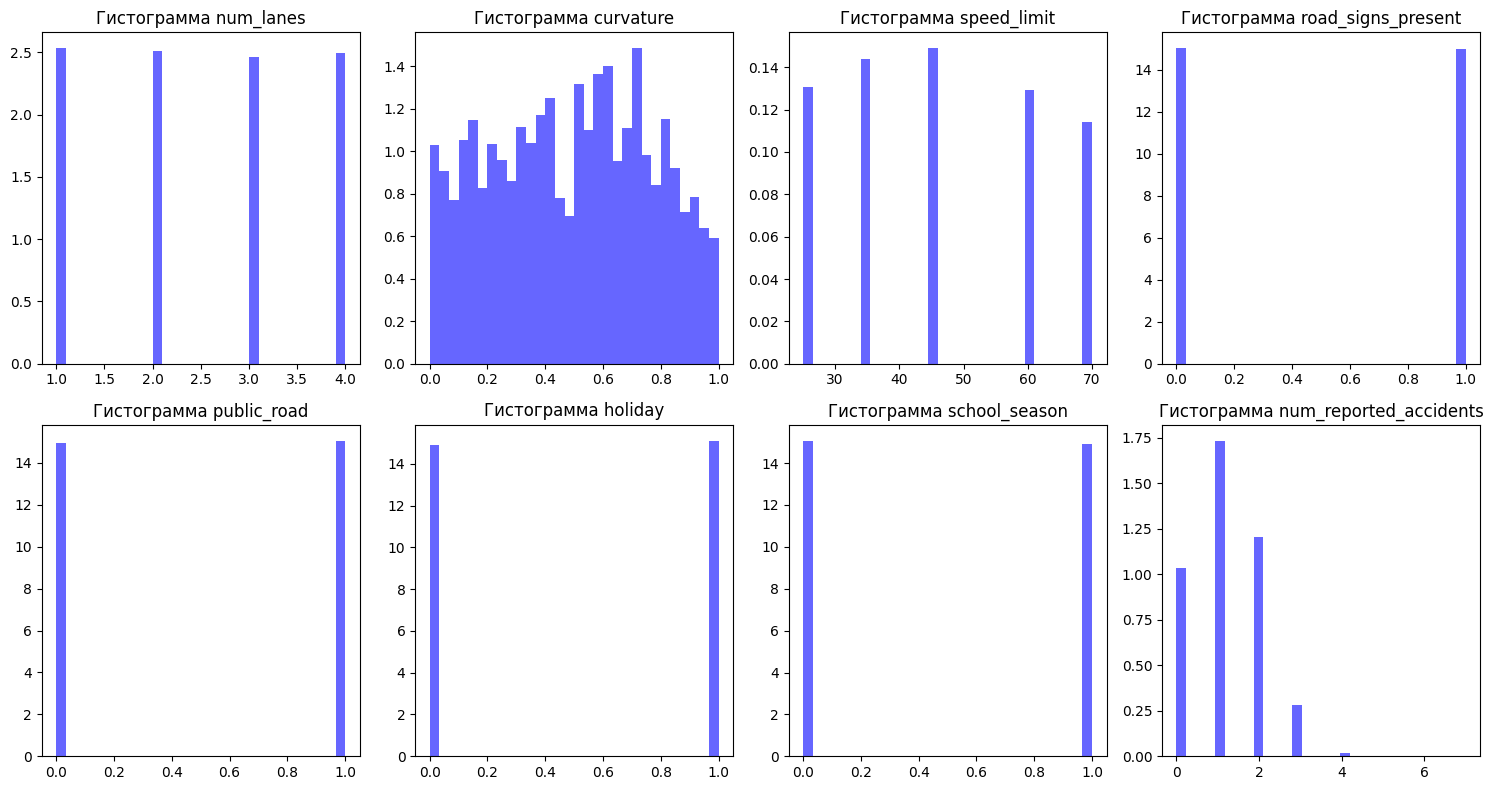

In [12]:
import matplotlib.pyplot as plt

# # Пример данных: 8 столбцов
# data = np.random.randn(1000, 8)  # 1000 строк, 8 столбцов
# columns = [f'feature_{i}' for i in range(8)]
# df = pd.DataFrame(data, columns=columns)

columns = numerical_data.columns[:8]
# Создаём сетку 2x4 (2 строки, 4 столбца)
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Плоский список осей для удобного цикла
axes = axes.ravel()

for i, col in enumerate(columns):
    axes[i].hist(data[col], bins=30, density=True, alpha=0.6, color='b')
    axes[i].set_title(f'Гистограмма {col}')

# Убираем пустые подграфики, если нужно
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [13]:
# Числовые признаки
numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

# Бинарные (логические) признаки
binary_features = ['road_signs_present', 'public_road', 'holiday', 'school_season']

In [14]:
y = data['accident_risk']
X = data.drop('accident_risk', axis=1)

## Анализ категориальных атрибутов

In [15]:
cat_features = X.select_dtypes(include=['object'])

In [16]:
cat_features

,road_type,lighting,weather,time_of_day
0,urban,daylight,rainy,afternoon
1,urban,daylight,clear,evening
2,rural,dim,clear,morning
3,highway,dim,rainy,morning
4,rural,daylight,foggy,evening
...,...,...,...,...
517749,highway,daylight,foggy,afternoon
517750,rural,daylight,rainy,morning
517751,urban,daylight,foggy,afternoon
517752,highway,night,clear,afternoon


In [17]:
cat_features.isnull().sum()

,0
road_type,0
lighting,0
weather,0
time_of_day,0


In [18]:
cat_features['road_type'].unique()

array(['urban', 'rural', 'highway'], dtype=object)

In [19]:
cat_features['lighting'].unique()

array(['daylight', 'dim', 'night'], dtype=object)

In [20]:
cat_features['weather'].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

In [21]:
cat_features['time_of_day'].unique()

array(['afternoon', 'evening', 'morning'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder

# train_data = pd.DataFrame({
#     'road_type': ['urban', 'rural', 'highway'],
#     'lighting': ['daylight', 'dim', 'night']
# })

# Создаём OneHotEncoder с handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Обучаем энкодер на тренировке
encoder.fit(cat_features)

# Применяем к тренировке и тесту
train_encoded = pd.DataFrame(
    encoder.transform(cat_features),
    columns=encoder.get_feature_names_out(['road_type', 'lighting', 'weather', 'time_of_day']),
    index=cat_features.index
)

# test_encoded = pd.DataFrame(
#     encoder.transform(test_data),
#     columns=encoder.get_feature_names_out(['road_type', 'lighting']),
#     index=test_data.index
# )

print("Train Encoded:")
print(train_encoded)
# print("\nTest Encoded:")
# print(test_encoded)

Train Encoded:
        road_type_rural  road_type_urban  lighting_dim  lighting_night  \
0                   0.0              1.0           0.0             0.0   
1                   0.0              1.0           0.0             0.0   
2                   1.0              0.0           1.0             0.0   
3                   0.0              0.0           1.0             0.0   
4                   1.0              0.0           0.0             0.0   
...                 ...              ...           ...             ...   
517749              0.0              0.0           0.0             0.0   
517750              1.0              0.0           0.0             0.0   
517751              0.0              1.0           0.0             0.0   
517752              0.0              0.0           0.0             1.0   
517753              0.0              0.0           1.0             0.0   

        weather_foggy  weather_rainy  time_of_day_evening  time_of_day_morning  
0              

## Создание новых атрибутов

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit(X[numerical_features])
X_poly = pd.DataFrame(
    poly.fit_transform(X[numerical_features]),
    columns=poly.get_feature_names_out(numerical_features)
)

In [24]:
X_poly

,num_lanes,curvature,speed_limit,num_reported_accidents,num_lanes^2,num_lanes curvature,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2
0,2.0,0.06,35.0,1.0,4.0,0.12,70.0,2.0,0.0036,2.10,0.06,1225.0,35.0,1.0
1,4.0,0.99,35.0,0.0,16.0,3.96,140.0,0.0,0.9801,34.65,0.00,1225.0,0.0,0.0
2,4.0,0.63,70.0,2.0,16.0,2.52,280.0,8.0,0.3969,44.10,1.26,4900.0,140.0,4.0
3,4.0,0.07,35.0,1.0,16.0,0.28,140.0,4.0,0.0049,2.45,0.07,1225.0,35.0,1.0
4,1.0,0.58,60.0,1.0,1.0,0.58,60.0,1.0,0.3364,34.80,0.58,3600.0,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,4.0,0.10,70.0,2.0,16.0,0.40,280.0,8.0,0.0100,7.00,0.20,4900.0,140.0,4.0
517750,4.0,0.47,35.0,1.0,16.0,1.88,140.0,4.0,0.2209,16.45,0.47,1225.0,35.0,1.0
517751,4.0,0.62,25.0,0.0,16.0,2.48,100.0,0.0,0.3844,15.50,0.00,625.0,0.0,0.0
517752,3.0,0.63,25.0,3.0,9.0,1.89,75.0,9.0,0.3969,15.75,1.89,625.0,75.0,9.0


In [25]:
X_added = pd.concat([train_encoded, X_poly, X[binary_features]], axis=1)

In [26]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.0036,2.10,0.06,1225.0,35.0,1.0,0,1,0,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.9801,34.65,0.00,1225.0,0.0,0.0,1,0,1,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,0.3969,44.10,1.26,4900.0,140.0,4.0,0,1,1,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.0049,2.45,0.07,1225.0,35.0,1.0,1,1,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.3364,34.80,0.58,3600.0,60.0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.0100,7.00,0.20,4900.0,140.0,4.0,1,1,0,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.2209,16.45,0.47,1225.0,35.0,1.0,1,1,0,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.3844,15.50,0.00,625.0,0.0,0.0,0,0,0,1
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,0.3969,15.75,1.89,625.0,75.0,9.0,1,0,1,1


In [27]:
X_added['bad_weather'] = X['weather'].isin(['rainy', 'foggy']).astype(int)
X_added['bad_visivility'] = (X['weather'].isin(['rainy', 'foggy']) & X['lighting'].isin(['dim', 'night'])).astype(int)

In [28]:
X_added

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,num_lanes,curvature,...,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.06,...,0.06,1225.0,35.0,1.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.99,...,0.00,1225.0,0.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.63,...,1.26,4900.0,140.0,4.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,0.07,...,0.07,1225.0,35.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.58,...,0.58,3600.0,60.0,1.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.10,...,0.20,4900.0,140.0,4.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.47,...,0.47,1225.0,35.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.62,...,0.00,625.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.63,...,1.89,625.0,75.0,9.0,1,0,1,1,0,0


## Тестирование на простой модели

In [29]:
X_norm_test = X_added.copy()

In [30]:
X_norm_test = X_norm_test.drop(['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature'], axis=1)

In [31]:
X_norm_test

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0


In [32]:
features_norm = ['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_norm = pd.DataFrame(
    scaler.fit_transform(X_added[features_norm]),
    columns=features_norm,
    index=X_added.index
)

In [34]:
X_num_norm

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,num_lanes^2,num_lanes curvature
0,-0.462347,-0.412481,-0.759581,-0.814729,-1.572918,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,-1.134835,-1.331952,-0.608849,-1.199431
1,-0.843188,-1.126322,-0.759581,-0.902649,1.839137,1.346344,-0.703840,-1.325918,0.372644,-1.055621,2.445241,0.785795,1.500938,3.020410
2,0.680175,1.729044,1.666411,0.943673,0.518342,1.346344,1.512963,0.906324,2.452060,1.780573,0.307094,1.400625,1.500938,1.437969
3,-0.462347,-0.412481,-0.759581,-0.800075,-1.536229,1.346344,-0.703840,-0.209797,0.372644,0.362476,-1.130069,-1.309181,1.500938,-1.023605
4,-0.462347,0.097406,0.808237,-0.052754,0.334898,-1.331192,0.879591,-0.209797,-0.815593,-0.701097,0.085287,0.795555,-1.136296,-0.693930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.680175,1.729044,1.666411,-0.609582,-1.426163,1.346344,1.512963,0.906324,2.452060,1.780573,-1.111371,-1.013151,1.500938,-0.891735
517750,-0.462347,-0.412481,-0.759581,-0.213941,-0.068678,1.346344,-0.703840,-0.209797,0.372644,0.362476,-0.338162,-0.398322,1.500938,0.734662
517751,-0.843188,-1.126322,-1.155661,-0.902649,0.481653,1.346344,-1.337212,-1.325918,-0.221475,-1.055621,0.261267,-0.460130,1.500938,1.394013
517752,2.584379,0.403338,-1.155661,1.866834,0.518342,0.453832,-1.337212,2.022445,-0.592799,2.135097,0.307094,-0.443864,0.270229,0.745652


In [35]:
X_without_norm = X_added.drop(features_norm, axis=1)

In [36]:
X_without_norm

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,1,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,1,0,0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,1
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,1,0
517750,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0,0,1,0
517751,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,1,0
517752,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Объединяем числовые и бинарные
X_processed = pd.concat([X_num_norm, X_without_norm], axis=1)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Обучение модели
model = LinearRegression()  # или Ridge(), Lasso()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Оценка качества
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.8324
MAE: 0.0531
MSE: 0.0046
RMSE: 0.0680


# Первая отправка 0.06734

In [39]:
test_df = pd.read_csv('/content/drive/MyDrive/Road_risk/test.csv')

In [40]:
test_df

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,690334,rural,2,0.01,45,dim,rainy,False,False,afternoon,True,True,2
172581,690335,rural,1,0.74,70,daylight,foggy,False,True,afternoon,False,False,2
172582,690336,urban,2,0.14,70,dim,clear,False,False,evening,True,True,1
172583,690337,urban,1,0.09,45,daylight,foggy,True,True,morning,False,True,0


In [41]:
test_df.isnull().sum()

,0
id,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0


In [42]:
cat_features_t = test_df.select_dtypes(include=['object'])

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Создаём OneHotEncoder с handle_unknown='ignore'
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Обучаем энкодер на тренировке
encoder.fit(cat_features_t)

test_encoded = pd.DataFrame(
    encoder.transform(cat_features_t),
    columns=encoder.get_feature_names_out(['road_type', 'lighting', 'weather', 'time_of_day']),
    index=cat_features_t.index
)

print("\nTest Encoded:")
print(test_encoded)


Test Encoded:
        road_type_rural  road_type_urban  lighting_dim  lighting_night  \
0                   0.0              0.0           0.0             1.0   
1                   0.0              1.0           1.0             0.0   
2                   0.0              1.0           1.0             0.0   
3                   1.0              0.0           0.0             0.0   
4                   0.0              0.0           0.0             0.0   
...                 ...              ...           ...             ...   
172580              1.0              0.0           1.0             0.0   
172581              1.0              0.0           0.0             0.0   
172582              0.0              1.0           1.0             0.0   
172583              0.0              1.0           0.0             0.0   
172584              0.0              0.0           0.0             1.0   

        weather_foggy  weather_rainy  time_of_day_evening  time_of_day_morning  
0              

In [44]:
numerical_features_t = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']


In [45]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_t = pd.DataFrame(
    poly.fit_transform(test_df[numerical_features_t]),
    columns=poly.get_feature_names_out(numerical_features_t)
)

In [46]:
X_poly_t

,num_lanes,curvature,speed_limit,num_reported_accidents,num_lanes^2,num_lanes curvature,num_lanes speed_limit,num_lanes num_reported_accidents,curvature^2,curvature speed_limit,curvature num_reported_accidents,speed_limit^2,speed_limit num_reported_accidents,num_reported_accidents^2
0,2.0,0.34,45.0,1.0,4.0,0.68,90.0,2.0,0.1156,15.30,0.34,2025.0,45.0,1.0
1,3.0,0.04,45.0,0.0,9.0,0.12,135.0,0.0,0.0016,1.80,0.00,2025.0,0.0,0.0
2,2.0,0.59,35.0,1.0,4.0,1.18,70.0,2.0,0.3481,20.65,0.59,1225.0,35.0,1.0
3,4.0,0.95,35.0,2.0,16.0,3.80,140.0,8.0,0.9025,33.25,1.90,1225.0,70.0,4.0
4,2.0,0.86,35.0,3.0,4.0,1.72,70.0,6.0,0.7396,30.10,2.58,1225.0,105.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,2.0,0.01,45.0,2.0,4.0,0.02,90.0,4.0,0.0001,0.45,0.02,2025.0,90.0,4.0
172581,1.0,0.74,70.0,2.0,1.0,0.74,70.0,2.0,0.5476,51.80,1.48,4900.0,140.0,4.0
172582,2.0,0.14,70.0,1.0,4.0,0.28,140.0,2.0,0.0196,9.80,0.14,4900.0,70.0,1.0
172583,1.0,0.09,45.0,0.0,1.0,0.09,45.0,0.0,0.0081,4.05,0.00,2025.0,0.0,0.0


In [47]:
test_encoded

,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
172580,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
172581,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172582,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
172583,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
X_added_t = pd.concat([test_encoded, X_poly_t, test_df[binary_features]], axis=1)

In [49]:
X_added_t['bad_weather'] = test_df['weather'].isin(['rainy', 'foggy']).astype(int)
X_added_t['bad_visivility'] = (test_df['weather'].isin(['rainy', 'foggy']) & test_df['lighting'].isin(['dim', 'night'])).astype(int)

In [50]:
features_norm = ['num_reported_accidents^2', 'speed_limit num_reported_accidents', 'speed_limit^2', 'curvature num_reported_accidents', 'curvature', 'num_lanes', 'speed_limit', 'num_reported_accidents', 'num_lanes speed_limit', 'num_lanes num_reported_accidents', 'curvature^2', 'curvature speed_limit', 'num_lanes^2', 'num_lanes curvature']

In [51]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_num_norm_t = pd.DataFrame(
#     scaler.fit_transform(X_added_t[features_norm]),
#     columns=features_norm,
#     index=X_added_t.index
# )
X_num_norm_t = pd.DataFrame(
    scaler.transform(X_added_t[features_norm]), # <-- ИСПОЛЬЗУЕМ ТОТ ЖЕ scaler, обученный на X_added
    columns=features_norm,
    index=X_added_t.index
)

In [52]:
print(len(test_encoded))
print(len(X_poly_t))
print(len(test_df[binary_features]))

172585
172585
172585


In [53]:
X_without_norm_t = X_added_t.drop(features_norm, axis=1)

In [54]:
X_processed_t = pd.concat([X_num_norm_t, X_without_norm_t], axis=1)

In [55]:
X_processed_t

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,...,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning,road_signs_present,public_road,holiday,school_season,bad_weather,bad_visivility
0,-0.462347,-0.208526,-0.231474,-0.404435,-0.545632,-0.438680,-0.070467,-0.209797,-0.370004,-0.346572,...,0.0,0.0,0.0,0.0,True,True,True,True,0,0
1,-0.843188,-1.126322,-0.231474,-0.902649,-1.646295,0.453832,-0.070467,-1.325918,0.298379,-1.055621,...,1.0,0.0,0.0,0.0,True,False,True,False,1,1
2,-0.462347,-0.412481,-0.759581,-0.038101,0.371587,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,...,0.0,0.0,0.0,0.0,True,False,True,True,0,0
3,0.680175,0.301361,-0.759581,1.881488,1.692382,1.346344,-0.703840,0.906324,0.372644,1.780573,...,0.0,1.0,0.0,0.0,False,False,False,False,1,0
4,2.584379,1.015203,-0.759581,2.877915,1.362183,-0.438680,-0.703840,2.022445,-0.667064,1.071524,...,0.0,0.0,1.0,0.0,True,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,0.680175,0.709270,-0.231474,-0.873342,-1.756362,-0.438680,-0.070467,0.906324,-0.370004,0.362476,...,0.0,1.0,0.0,0.0,False,False,True,True,1,1
172581,0.680175,1.729044,1.666411,1.266047,0.921918,-1.331192,1.512963,0.906324,-0.667064,-0.346572,...,1.0,0.0,0.0,0.0,False,True,False,False,1,0
172582,-0.462347,0.301361,1.666411,-0.697502,-1.279408,-0.438680,1.512963,-0.209797,0.372644,-0.346572,...,0.0,0.0,1.0,0.0,False,False,True,True,0,0
172583,-0.843188,-1.126322,-0.231474,-0.902649,-1.462852,-1.331192,-0.070467,-1.325918,-1.038388,-1.055621,...,1.0,0.0,0.0,1.0,True,True,False,True,1,0


In [56]:
y_final = model.predict(X_processed_t)

In [57]:
y_final

array([0.32903792, 0.16190007, 0.18678509, ..., 0.26211629, 0.17183121,
       0.48182226])

In [58]:
results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.329038
1  517755       0.161900
2  517756       0.186785
3  517757       0.420874
4  517758       0.352518


# Улучшение модели 0.05817

In [59]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,      # Количество деревьев
    learning_rate=0.08,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_train, y_train)

# Предсказания
print("Предсказания XGBoost...")
y_pred = model.predict(X_test)

# Оценка качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- XGBoost ---")
print(f"MSE: {mse:.5f}")
print(f"R²: {r2:.5f}")

# y_final = model.predict(X_processed_t)

# results_df = pd.DataFrame({
#     'id': test_df['id'].values,
#     'accident_risk': y_final
# })

# # Проверим первые строки
# print(results_df.head())

# # Сохраняем в CSV файл
# results_df.to_csv('submission.csv', index=False)

Обучение XGBoost...
Предсказания XGBoost...

--- XGBoost ---
MSE: 0.00317
R²: 0.88515


In [60]:
y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.295464
1  517755       0.123245
2  517756       0.180127
3  517757       0.305305
4  517758       0.407763


Подбор гиперпараметров

In [61]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Определяем параметры, которые хотим перебрать
# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1, 0.15],
#     'max_depth': [6, 8, 10],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Создаём базовую модель
# base_model = XGBRegressor(random_state=42)

# # Создаём объект GridSearchCV
# grid_search = GridSearchCV(
#     estimator=base_model,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Используем MSE (с минусом, т.к. GridSearch ищет максимум)
#     cv=3,  # 3 фолда кросс-валидации (уменьшите, если обучение слишком долго)
#     n_jobs=-1,  # Использовать все ядра процессора
#     verbose=1   # Печатать прогресс
# )

# # Запускаем поиск
# print("Запуск GridSearchCV...")
# grid_search.fit(X_train, y_train)

# # Лучшая модель
# best_model = grid_search.best_estimator_

# # Предсказания лучшей модели
# y_pred_best = best_model.predict(X_test)

# # Оценка качества лучшей модели
# mse_best = mean_squared_error(y_test, y_pred_best)
# print(f"\n--- Лучшая модель XGBoost (GridSearchCV) ---")
# print(f"Best params: {grid_search.best_params_}")
# print(f"Best CV MSE: {-grid_search.best_score_:.5f}")  # минус, т.к. neg_mean_squared_error
# print(f"Test MSE: {mse_best:.5f}")

--- Лучшая модель XGBoost (GridSearchCV) ---
Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
Best CV MSE: 0.00315
Test MSE: 0.00316

Проверка на переобучение

In [62]:
# # Обучите модель
# model = XGBRegressor(n_estimators=200, learning_rate=0.08, max_depth=8, random_state=42)
# model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.5f}")
print(f"Test MSE: {mse_test:.5f}")

# Если MSE_train << MSE_test, возможно, переобучение
if mse_train < mse_test * 0.5:  # Пример грубого условия
    print("Возможно, модель переобучается.")
    # Попробуйте уменьшить n_estimators, max_depth, добавить регуляризацию

Train MSE: 0.00296
Test MSE: 0.00317


Обучение на всей выборке и лучшей модели

In [63]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_processed, y)

# # # Предсказания
# # print("Предсказания XGBoost...")
# y_pred = model.predict(X_processed)

# # # Оценка качества
# mse = mean_squared_error(y, y_pred)
# # r2 = r2_score(y_test, y_pred)

# # print(f"\n--- XGBoost ---")
# print(f"MSE: {mse:.5f}")
# # print(f"R²: {r2:.5f}")

Обучение XGBoost...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

       id  accident_risk
0  517754       0.293339
1  517755       0.123178
2  517756       0.181379
3  517757       0.312760
4  517758       0.398679


# Дополнительный анализ и добавление новых атрибутов

<Axes: xlabel='accident_risk', ylabel='Count'>

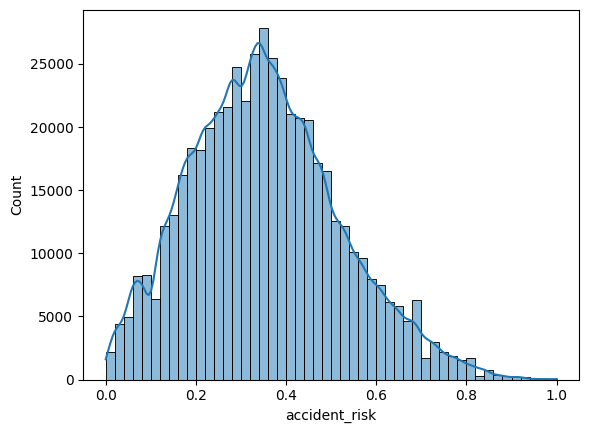

In [65]:
sns.histplot(y, kde = True, bins = 50)

In [66]:
print(np.mean(y))
print(np.median(y))

0.3523774031683
0.34


In [67]:
print(np.mean(y_final))
print(np.median(y_final))

0.35168552
0.33611342


<Axes: ylabel='Count'>

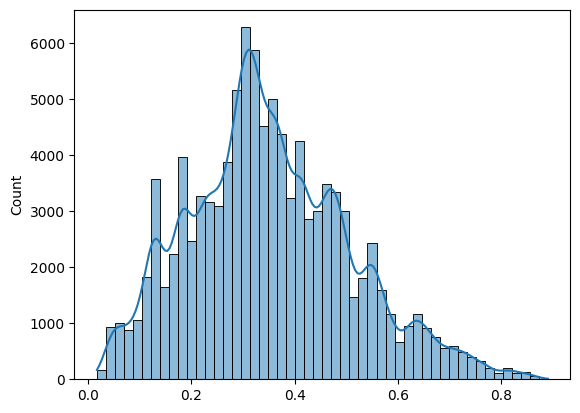

In [68]:
sns.histplot(y_pred, kde = True, bins = 50)

Попробовать добавить новые атрибуты

In [69]:
# Получаем коэффициенты
feature_importance = abs(model.coef_)  # берем абсолютные значения

# Создаём DataFrame для удобства
feature_names = X_processed.columns  # имена признаков
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values(by='importance', ascending=False)

print(importance_df)

AttributeError: Coefficients are not defined for Booster type None

In [ ]:
FEATURES = ['road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting', 'weather', 'road_signs_present',	'public_road', 'time_of_day', 'holiday', 'school_season', 'num_reported_accidents']

# DO ENCODING FOR EACH X COLUMN
for col in FEATURES:
    mean_encode = data.groupby(col)['accident_risk'].mean()
    std_encode  = data.groupby(col)['accident_risk'].std()

    print(mean_encode)
    print(std_encode)
    print('-'*60)
    # # APPLY MEAN ENCODE
    # train_df[f'mean_{col}'] = train_df[col].map(mean_encode)
    # test_df[f'mean_{col}']  = test_df[col].map(mean_encode)

    # # APPLY STD ENCODE
    # train_df[f'std_{col}'] = train_df[col].map(std_encode)
    # test_df[f'std_{col}']  = test_df[col].map(std_encode)

num_reported_accidents > 2

lighting = 'night'

speed_limit >= 60

curvature >= 0.4?

- num_reported_accidents + curvature
- speed_limit + curvature
- + speed_limit >= 60
- + curvature >= 0.4
- + num_reported_accidents > 2
- lighting = 'night' & speed_limit >= 60
- speed_limit >= 60 & curvature >= 0.4
- lighting = 'night' & curvature >= 0.4
- num_reported_accidents > 2 & speed_limit >= 60

In [70]:
X_processed['large_num_reported_accidents'] = (X_added['num_reported_accidents'] > 2).astype(int)
X_processed['strong_curvature'] = (X_added['curvature'] >= 0.4).astype(int)
X_processed['high_speed_limit'] = (X_added['speed_limit'] >= 60).astype(int)

In [71]:
X_processed['high_speed_night'] = X_processed['lighting_night'] * X_processed['high_speed_limit']
X_processed['high_speed_curvature'] = X_processed['high_speed_limit'] * X_processed['strong_curvature']
X_processed['strong_curvature_night'] = X_processed['strong_curvature'] * X_processed['lighting_night']
X_processed['high_speed_reported_accidents'] = X_processed['large_num_reported_accidents'] * X_processed['high_speed_limit']

In [ ]:
    # mean_encode = data[data['curvature'] >= 0.4].groupby('curvature')['accident_risk'].mean()
    # std_encode  = data[data['curvature'] >= 0.4].groupby('curvature')['accident_risk'].std()

    # print(mean_encode)
    # print(std_encode)

In [ ]:
# mean_encode = data.groupby('curvature')['accident_risk'].mean()
# std_encode  = data.groupby('curvature')['accident_risk'].std()

# print(mean_encode)
# print(std_encode)

In [ ]:
# # Разделение на train/test
# X_train, X_test, y_train, y_test = train_test_split(
#     X_processed, y, test_size=0.2, random_state=42
# )

# model.fit(X_train, y_train)

# # Предсказания
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # MSE
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)

# print(f"Train MSE: {mse_train:.5f}")
# print(f"Test MSE: {mse_test:.5f}")

# # Если MSE_train << MSE_test, возможно, переобучение
# if mse_train < mse_test * 0.5:  # Пример грубого условия
#     print("Возможно, модель переобучается.")
#     # Попробуйте уменьшить n_estimators, max_depth, добавить регуляризацию

Добавить признаки

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Параметры модели (можно настраивать для улучшения качества)
model = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=8,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

# Обучение модели
print("Обучение XGBoost...")
model.fit(X_processed, y)


In [72]:
X_processed_t['large_num_reported_accidents'] = (X_added_t['num_reported_accidents'] > 2).astype(int)
X_processed_t['strong_curvature'] = (X_added_t['curvature'] >= 0.4).astype(int)
X_processed_t['high_speed_limit'] = (X_added_t['speed_limit'] >= 60).astype(int)

X_processed_t['high_speed_night'] = X_processed_t['lighting_night'] * X_processed_t['high_speed_limit']
X_processed_t['high_speed_curvature'] = X_processed_t['high_speed_limit'] * X_processed_t['strong_curvature']
X_processed_t['strong_curvature_night'] = X_processed_t['strong_curvature'] * X_processed_t['lighting_night']
X_processed_t['high_speed_reported_accidents'] = X_processed_t['large_num_reported_accidents'] * X_processed_t['high_speed_limit']

In [ ]:
# model.fit(X_processed, y)

y_final = model.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('submission.csv', index=False)

# Тестирование моделей с дополнительными признаками

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Обычная линейная регрессия ---
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.5f}, R²: {r2_lin:.5f}")

# --- 2. Ridge (L2 регуляризация) ---
model_ridge = Ridge(alpha=1.0)  # Попробуйте разные alpha
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge:.5f}, R²: {r2_ridge:.5f}")

# --- 3. Lasso (L1 регуляризация) ---
model_lasso = Lasso(alpha=0.1)  # Попробуйте разные alpha
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso:.5f}, R²: {r2_lasso:.5f}")

# --- 4. ElasticNet (L1 + L2) ---
model_enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha и l1_ratio для настройки
model_enet.fit(X_train, y_train)
y_pred_enet = model_enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet MSE: {mse_enet:.5f}, R²: {r2_enet:.5f}")

In [ ]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print(mse_XGB)

In [ ]:
# 1. Получаем важность признаков
importances = model_XGB.feature_importances_

# 2. Получаем имена признаков (из X_train)
feature_names = X_train.columns

# 3. Создаём DataFrame для удобства
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 4. Выводим результат
print(importance_df)

# 5. (Опционально) Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10]) # топ-10
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()  # Чтобы самый важный признак был сверху
plt.show()

признаки со средними значениями по атрибутам

попробовать мета модель (стекинг)

In [ ]:
X_processed

In [73]:
train_df_with_target = X_processed.copy() # Копируем, чтобы не изменять оригинал
train_df_with_target['accident_risk'] = y.values # Добавляем целевую переменную как новый столбец

features_for_target_mean = ['speed_limit', 'num_reported_accidents', 'curvature']

for col in features_for_target_mean:
  name = f'TM_{col}'

  val = train_df_with_target.groupby(col)['accident_risk'].mean()

  X_processed[name] = X_processed[col].map(val)

# 4. Создаём новый признак в тестовом датафрейме
# Используем ТОТ ЖЕ словарь/серию, вычисленный на ТРЕНИРОВКЕ
  X_processed_t[name] = X_processed_t[col].map(val)

In [ ]:
X_processed

In [ ]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print(mse_XGB)

In [ ]:
# 1. Получаем важность признаков
importances = model_XGB.feature_importances_

# 2. Получаем имена признаков (из X_train)
feature_names = X_train.columns

# 3. Создаём DataFrame для удобства
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 4. Выводим результат
print(importance_df)

# 5. (Опционально) Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10]) # топ-10
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.gca().invert_yaxis()  # Чтобы самый важный признак был сверху
plt.show()

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Ваши параметры
FOLDS = 7
SEED = 42

params = {
    "objective": "reg:squarederror",   # Задача регрессии (MSE)
    "eval_metric": "rmse",             # Метрика для отслеживания (RMSE)
    "learning_rate": 0.01,
    "max_depth": 6,
    "subsample": 0.9,
    "colsample_bytree": 0.6,
    "seed": SEED,
    "device": "cuda",                  # Используем GPU (если доступно)
}

# --- Подготовка данных ---
# Предположим, у вас есть:
# X_train: pd.DataFrame или np.array - тренировочные признаки
# y_train: pd.Series или np.array - целевая переменная для тренировки
# X_test: pd.DataFrame или np.array - тестовые признаки

# Пример:
# X_train = ...
# y_train = ...
# X_test = ...

# Убедитесь, что X_train и y_train - это numpy arrays или pandas objects
# X_train = np.array(X_train) # если нужно
# y_train = np.array(y_train) # если нужно

# --- 1. Подготовим DMatrix для XGBoost ---
# DMatrix - это внутренний формат данных XGBoost, оптимизированный для производительности
dtrain = xgb.DMatrix(X_processed, label=y)

# --- 2. Запустим кросс-валидацию ---
# cv_results будет содержать метрики для каждой итерации
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,  # Максимальное количество деревьев
    nfold=FOLDS,
    stratified=False,      # Для регрессии обычно не используется
    shuffle=True,          # Перемешивание перед разбиением
    metrics='rmse',        # Указываем метрику, можно несколько через запятую
    early_stopping_rounds=50, # Остановка, если метрика не улучшается 50 итераций
    seed=SEED,
    verbose_eval=False,    # Не печатать прогресс (если True - будет много вывода)
    show_stdv=True         # Показывать стандартное отклонение по фолдам
)

# --- 3. Найдём лучшее количество деревьев по CV ---
best_rmse_mean = cv_results['test-rmse-mean'].min()
best_iter_index = cv_results['test-rmse-mean'].idxmin()
best_n_trees = best_iter_index + 1 # Индексация с 0

print(f"Лучшее среднее RMSE по CV: {best_rmse_mean:.5f}")
print(f"Лучшее количество деревьев: {best_n_trees}")

# --- 4. Обучим финальную модель на ВСЕХ тренировочных данных ---
# Используем лучшее количество деревьев
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_n_trees,
    verbose_eval=False  # Не печатать прогресс
)

# --- 5. Сделаем предсказания на тесте ---
dtest = xgb.DMatrix(X_processed_t)
y_pred_test = model.predict(dtest)

# --- 6. (Опционально) Сделаем предсказания на тренировке для анализа ---
y_pred_train = model.predict(dtrain)
mse_train = mean_squared_error(y, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f"RMSE на тренировке: {rmse_train:.5f}")


# --- 7. Сохранение предсказаний ---
# Предположим, у вас есть список id для тестовых данных (например, X_test.index или отдельный список)
results_df = pd.DataFrame({
    'id': test_df['id'].values, # Замените test_ids на ваш список id
    'accident_risk': y_pred_test
})
results_df.to_csv('xgb_cv_submission.csv', index=False)
print("Предсказания XGBoost (CV) сохранены в 'xgb_cv_submission.csv'")

# --- 8. (Опционально) Важность признаков ---
# importance = model.get_score(importance_type='gain')
# importance_df = pd.DataFrame(
#     list(importance.items()),
#     columns=['feature', 'importance']
# ).sort_values(by='importance', ascending=False)
# print("\nTop Feature Importances (Gain):")
# print(importance_df.head(10))

# Стекинг

In [74]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, shuffle=True
)

In [75]:
# --- 1. Обычная линейная регрессия ---
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.5f}, R²: {r2_lin:.5f}")

Linear Regression MSE: 0.00335, R²: 0.87874


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Параметры модели (можно настраивать для улучшения качества)
model_RF = RandomForestRegressor(
    n_estimators=100,        # Количество деревьев в лесу
    max_depth=10,            # Максимальная глубина дерева (аналогично XGBoost)
    min_samples_split=2,     # Минимальное количество образцов для разделения узла
    min_samples_leaf=1,      # Минимальное количество образцов в листе
    max_features='sqrt',     # Количество признаков для выбора при поиске лучшего разделения ('sqrt' часто хорош)
    # max_features=0.8,      # Или доля, например 0.8
    random_state=42          # Для воспроизводимости
)

# Обучение модели
model_RF.fit(X_train, y_train)

# Предсказания
y_pred_RF = model_RF.predict(X_test)

# Оценка качества (MSE)
mse_RF = mean_squared_error(y_test, y_pred_RF)
print(f"MSE Random Forest: {mse_RF:.5f}")

# (Опционально) Оценка на тренировке для проверки переобучения
y_pred_train_RF = model_RF.predict(X_train)
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
print(f"MSE Random Forest (Train): {mse_train_RF:.5f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Параметры модели (можно настраивать для улучшения качества)
model_RF = RandomForestRegressor(
    n_estimators=100,        # Количество деревьев в лесу
    max_depth=12,            # Максимальная глубина дерева (аналогично XGBoost)
    min_samples_split=2,     # Минимальное количество образцов для разделения узла
    min_samples_leaf=1,      # Минимальное количество образцов в листе
    max_features='sqrt',     # Количество признаков для выбора при поиске лучшего разделения ('sqrt' часто хорош)
    # max_features=0.8,      # Или доля, например 0.8
    random_state=42          # Для воспроизводимости
)

# Обучение модели
model_RF.fit(X_train, y_train)

# Предсказания
y_pred_RF = model_RF.predict(X_test)

# Оценка качества (MSE)
mse_RF = mean_squared_error(y_test, y_pred_RF)
print(f"MSE Random Forest: {mse_RF:.5f}")

# (Опционально) Оценка на тренировке для проверки переобучения
y_pred_train_RF = model_RF.predict(X_train)
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
print(f"MSE Random Forest (Train): {mse_train_RF:.5f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Параметры модели (можно настраивать для улучшения качества)
model_RF = RandomForestRegressor(
    n_estimators=100,        # Количество деревьев в лесу
    max_depth=15,            # Максимальная глубина дерева (аналогично XGBoost)
    min_samples_split=2,     # Минимальное количество образцов для разделения узла
    min_samples_leaf=1,      # Минимальное количество образцов в листе
    max_features='sqrt',     # Количество признаков для выбора при поиске лучшего разделения ('sqrt' часто хорош)
    # max_features=0.8,      # Или доля, например 0.8
    random_state=42          # Для воспроизводимости
)

# Обучение модели
model_RF.fit(X_train, y_train)

# Предсказания
y_pred_RF = model_RF.predict(X_test)

# Оценка качества (MSE)
mse_RF = mean_squared_error(y_test, y_pred_RF)
print(f"MSE Random Forest: {mse_RF:.5f}")

# (Опционально) Оценка на тренировке для проверки переобучения
y_pred_train_RF = model_RF.predict(X_train)
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
print(f"MSE Random Forest (Train): {mse_train_RF:.5f}")

In [ ]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
print(mse_XGB)

In [ ]:
sns.histplot(y_pred_lin, kde = True, bins = 50)

In [ ]:
sns.histplot(y_pred_RF, kde = True, bins = 50)

In [ ]:
sns.histplot(y_pred_XGB, kde = True, bins = 50)

In [ ]:
sns.histplot(y_test, kde = True, bins = 50)

In [76]:
X_processed_t = X_processed_t.drop('TM_curvature', axis=1)
X_processed = X_processed.drop('TM_curvature', axis=1)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# --- Ваши базовые модели ---
# Предположим, X_train_full, y_train_full - это ваш полный тренировочный датасет
# X_test - ваш тестовый датасет (для Kaggle submission)

base_models = [
    ('linear', LinearRegression()),
    ('xgb', XGBRegressor(
        n_estimators=200,
        colsample_bytree=0.8,
        learning_rate=0.05,     # Скорость обучения
        max_depth=10,           # Максимальная глубина дерева
        subsample=0.8,
        random_state=42
    )),
    ('rf', RandomForestRegressor(
        n_estimators=100,        # Количество деревьев в лесу
        max_depth=15,            # Максимальная глубина дерева (аналогично XGBoost)
        min_samples_split=2,     # Минимальное количество образцов для разделения узла
        min_samples_leaf=1,      # Минимальное количество образцов в листе
        max_features='sqrt',     # Количество признаков для выбора при поиске лучшего разделения ('sqrt' часто хорош)
        random_state=42          # Для воспроизводимости
    ))
]

meta_model = LinearRegression() # Мета-модель

# --- Подготовим OOF и тестовые предсказания ---
# Предположим, у вас 10000 тренировочных примеров, и 3 базовые модели -> X_meta_train будет (10000, 3)
n_train = len(X_processed)
n_test = len(X_processed_t)
n_models = len(base_models)

# Матрица для OOF предсказаний (для обучения мета-модели)
X_meta_train = np.zeros((n_train, n_models))
# Матрица для тестовых предсказаний (для финального предсказания мета-моделью)
X_meta_test = np.zeros((n_test, n_models))

# # --- Обучение с кросс-валидацией ---
# kfold = KFold(n_splits=5, shuffle=True, random_state=42) # 5 фолдов

# for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_processed)):
#     print(f"Обработка фолда {fold_idx + 1}/{kfold.n_splits}...")

#     X_tr_fold = X_processed.iloc[train_idx] if isinstance(X_processed, pd.DataFrame) else X_processed[train_idx]
#     y_tr_fold = X_processed.iloc[train_idx] if isinstance(X_processed, pd.Series) else X_processed[train_idx]
#     X_val_fold = X_processed.iloc[val_idx] if isinstance(X_processed, pd.DataFrame) else X_processed[val_idx]

#     # Для каждого базового алгоритма
#     for model_idx, (name, model) in enumerate(base_models):
#         print(f"  Обучение {name} на фолде {fold_idx + 1}...")

#         # Копируем модель, чтобы не переобучать один и тот же объект
#         cloned_model = model.__class__(**model.get_params())
#         cloned_model.fit(X_tr_fold, y_tr_fold)

#         # Предсказание на валидационной части (OOF)
#         val_pred = cloned_model.predict(X_val_fold)
#         X_meta_train[val_idx, model_idx] = val_pred # Сохраняем в соответствующие строки

#         # Предсказание на ВСЁМ тестовом датасете
#         test_pred = cloned_model.predict(X_processed_t)
#         X_meta_test[:, model_idx] += test_pred / kfold.n_splits # Усредняем по фолдам

#         print(f"  {name} на фолде {fold_idx + 1} завершена.")

# print("Все фолды обработаны.")

# # --- Обучение мета-модели ---
# print("Обучение мета-модели...")
# meta_model.fit(X_meta_train, y)

# # --- Финальное предсказание ---
# print("Получение финального предсказания...")
# final_predictions = meta_model.predict(X_meta_test)

# # --- Сохранение результата ---
# results_df = pd.DataFrame({
#     'id': X_test.index, # или соответствующий id
#     'accident_risk': final_predictions
# })
# results_df.to_csv('advanced_stacking_submission.csv', index=False)
# print("Предсказания сложного стекинга сохранены в 'advanced_stacking_submission.csv'")

# # --- Оценка качества на тренировке (только для понимания) ---
# train_pred_meta = meta_model.predict(X_meta_train)
# train_mse_meta = mean_squared_error(y, train_pred_meta)
# print(f"MSE на тренировке (стекинг): {train_mse_meta:.5f}")

In [ ]:
# --- Обучение с кросс-валидацией ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # 5 фолдов

# Убедитесь, что X_train_full и y_train_full имеют одинаковую длину и индексы
# Если это X_processed и y, то используйте их
X_train_full = X_processed # или как у вас называется тренировочный X
y_train_full = y # или как у вас называется тренировочный y

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train_full)):
    print(f"Обработка фолда {fold_idx + 1}/{kfold.n_splits}...")

    # Правильное извлечение строк для X
    X_tr_fold = X_train_full.iloc[train_idx] if isinstance(X_train_full, pd.DataFrame) else X_train_full[train_idx]
    # Правильное извлечение строк для y
    y_tr_fold = y_train_full.iloc[train_idx] if isinstance(y_train_full, pd.Series) else y_train_full[train_idx]
    X_val_fold = X_train_full.iloc[val_idx] if isinstance(X_train_full, pd.DataFrame) else X_train_full[val_idx]
    # Соответственно, y для валидации (если нужно для вычисления OOF)
    y_val_fold = y_train_full.iloc[val_idx] if isinstance(y_train_full, pd.Series) else y_train_full[val_idx]

    # Для каждого базового алгоритма
    for model_idx, (name, model) in enumerate(base_models):
        print(f"  Обучение {name} на фолде {fold_idx + 1}...")

        # Копируем модель, чтобы не переобучать один и тот же объект
        cloned_model = model.__class__(**model.get_params())
        cloned_model.fit(X_tr_fold, y_tr_fold)

        # Предсказание на валидационной части (OOF)
        val_pred = cloned_model.predict(X_val_fold)
        X_meta_train[val_idx, model_idx] = val_pred # Сохраняем в соответствующие строки

        # Предсказание на ВСЁМ тестовом датасете
        test_pred = cloned_model.predict(X_processed_t)
        X_meta_test[:, model_idx] += test_pred / kfold.n_splits # Усредняем по фолдам

        print(f"  {name} на фолде {fold_idx + 1} завершена.")

print("Все фолды обработаны.")

In [ ]:
# --- Обучение мета-модели ---
print("Обучение мета-модели...")
meta_model.fit(X_meta_train, y)

# --- Финальное предсказание ---
print("Получение финального предсказания...")
final_predictions = meta_model.predict(X_meta_test)

# --- Сохранение результата ---
results_df = pd.DataFrame({
    'id': test_df['id'].values, # или соответствующий id
    'accident_risk': final_predictions
})
results_df.to_csv('advanced_stacking_submission.csv', index=False)
print("Предсказания сложного стекинга сохранены в 'advanced_stacking_submission.csv'")

# --- Оценка качества на тренировке (только для понимания) ---
train_pred_meta = meta_model.predict(X_meta_train)
train_mse_meta = mean_squared_error(y, train_pred_meta)
print(f"MSE на тренировке (стекинг): {train_mse_meta:.5f}")

In [ ]:
import pandas as pd
import numpy as np

# Предположим, y_pred_lin, y_pred_xgb, y_pred_rf - это ваши OOF предсказания для мета-модели
# или просто предсказания на тесте

# Создайте датафрейм с предсказаниями
pred_df = pd.DataFrame({'Linear': y_pred_lin, 'XGB': y_pred_XGB, 'RF': y_pred_RF})

# Посчитайте корреляцию
print(pred_df.corr())

# Random Forest

In [ ]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform
import numpy as np

# Определяем модель
base_model = RandomForestRegressor(random_state=42)

# Фиксированные списки параметров
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.7]
}

# # Определяем распределения параметров для поиска
# param_dist = {
#     'n_estimators': randint(100, 300),      # Количество деревьев
#     'max_depth': randint(10, 30),           # Максимальная глубина
#     'min_samples_split': randint(2, 10),    # Мин. кол-во для разделения
#     'min_samples_leaf': randint(1, 5),      # Мин. кол-во в листе
#     'max_features': ['sqrt', 'log2', None, uniform(0.5, 0.5)] # Можно указать долю признаков
#     # uniform(0.5, 0.5) означает от 0.5 до (0.5 + 0.5) = 1.0
# }

# Создаём RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    # n_iter=30,  # Количество случайных комбинаций
    scoring='neg_mean_squared_error',  # Опять используем отрицательный MSE
    cv=3,  # 5 фолдов
    verbose=1,  # Печатать прогресс
    random_state=42
)

# Запускаем поиск
print("Запуск RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Лучшая модель
best_model_RF = random_search.best_estimator_

print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший CV Score (neg-MSE): {random_search.best_score_:.5f}")
print(f"Лучший CV MSE: {-random_search.best_score_:.5f}")

# Предсказания лучшей модели на тесте
y_pred_best_RF = best_model_RF.predict(X_test)
mse_best_RF = mean_squared_error(y_test, y_pred_best_RF)
print(f"MSE лучшего Random Forest (Test): {mse_best_RF:.5f}")

# Предсказания на тренировке
y_pred_train_best_RF = best_model_RF.predict(X_train)
mse_train_best_RF = mean_squared_error(y_train, y_pred_train_best_RF)
print(f"MSE лучшего Random Forest (Train): {mse_train_best_RF:.5f}")

Лучшие параметры: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Параметры модели (можно настраивать для улучшения качества)
model_RF = RandomForestRegressor(
    n_estimators=150,        # Количество деревьев в лесу
    max_depth=15,            # Максимальная глубина дерева (аналогично XGBoost)
    min_samples_split=2,     # Минимальное количество образцов для разделения узла
    min_samples_leaf=2,      # Минимальное количество образцов в листе
    max_features='sqrt',     # Количество признаков для выбора при поиске лучшего разделения ('sqrt' часто хорош)
    # max_features=0.8,      # Или доля, например 0.8
    random_state=42          # Для воспроизводимости
)

# Обучение модели
model_RF.fit(X_processed, y)

In [ ]:
y_final = model_RF.predict(X_processed_t)

# --- Сохранение результата ---
results_df = pd.DataFrame({
    'id': test_df['id'].values, # или соответствующий id
    'accident_risk': y_final
})
results_df.to_csv('rf_submission.csv', index=False)

# XGB с эвристикой

Важность признаков (LinearRegression):
                               feature  coefficient  importance
35                      TM_speed_limit    -0.236347    0.236347
30                    high_speed_limit     0.223752    0.223752
17                      lighting_night     0.184741    0.184741
28        large_num_reported_accidents     0.097317    0.097317
4                            curvature     0.079272    0.079272
26                         bad_weather     0.060473    0.060473
19                       weather_rainy     0.030530    0.030530
18                       weather_foggy     0.029943    0.029943
36           TM_num_reported_accidents     0.009775    0.009775
34       high_speed_reported_accidents    -0.009363    0.009363
32                high_speed_curvature     0.006941    0.006941
3     curvature num_reported_accidents     0.006364    0.006364
2                        speed_limit^2    -0.004360    0.004360
33              strong_curvature_night     0.004217    0.004217
2

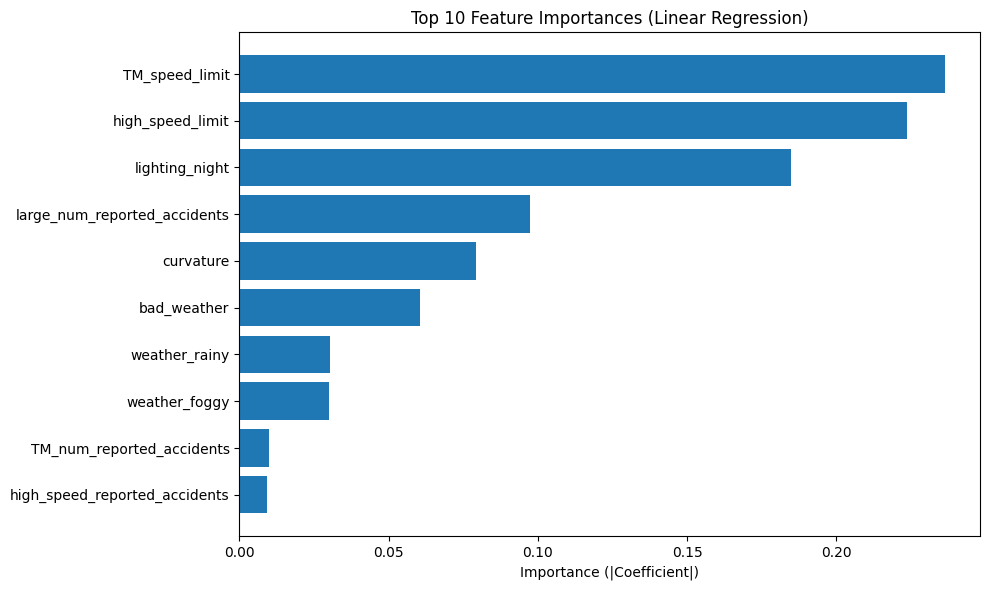

In [77]:
# --- 1. Обычная линейная регрессия ---
model_lin = LinearRegression()
model_lin.fit(X_processed, y)

# 1. Получаем коэффициенты
# model_lin.coef_ - это numpy array с одним значением для каждого признака
coefficients = model_lin.coef_

# 2. Получаем имена признаков (из датафрейма X_processed)
feature_names = X_processed.columns

# 3. Вычисляем "важность" как абсолютное значение коэффициента
importance = np.abs(coefficients)

# 4. Создаём датафрейм для удобства отображения и анализа
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients, # Полезно для понимания направления влияния
    'importance': importance
}).sort_values(by='importance', ascending=False, key=abs) # Сортировка по абсолютному значению

# 5. Выводим результат
print("Важность признаков (LinearRegression):")
print(importance_df)

# (Опционально) Визуализация топ-10 самых важных признаков
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xlabel('Importance (|Coefficient|)')
plt.title('Top 10 Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()  # Чтобы самый важный был сверху
plt.tight_layout()
plt.show()

In [78]:
important_feature_names = [
    'TM_speed_limit',                 # -0.236
    'high_speed_limit',               #  0.224
    'lighting_night',                 #  0.185
    'large_num_reported_accidents',   #  0.097
    'curvature',                      #  0.079/
    'bad_weather',                    #  0.060
    'weather_rainy',                  #  0.031
    'weather_foggy',                  #  0.030
    'TM_num_reported_accidents',   #  0.010 - опционально
    'high_speed_reported_accidents', # -0.009 - опционально
    # и т.д., если вы хотите включить чуть больше
]
X_important = X_processed[important_feature_names]

In [ ]:
X_important

Важность признаков (LinearRegression):
                         feature  coefficient  importance
1               high_speed_limit     0.210179    0.210179
2                 lighting_night     0.189765    0.189765
0                 TM_speed_limit    -0.137923    0.137923
3   large_num_reported_accidents     0.104502    0.104502
4                      curvature     0.083044    0.083044
5                    bad_weather     0.062045    0.062045
6                  weather_rainy     0.031268    0.031268
7                  weather_foggy     0.030776    0.030776
8      TM_num_reported_accidents    -0.022254    0.022254
9  high_speed_reported_accidents    -0.007209    0.007209


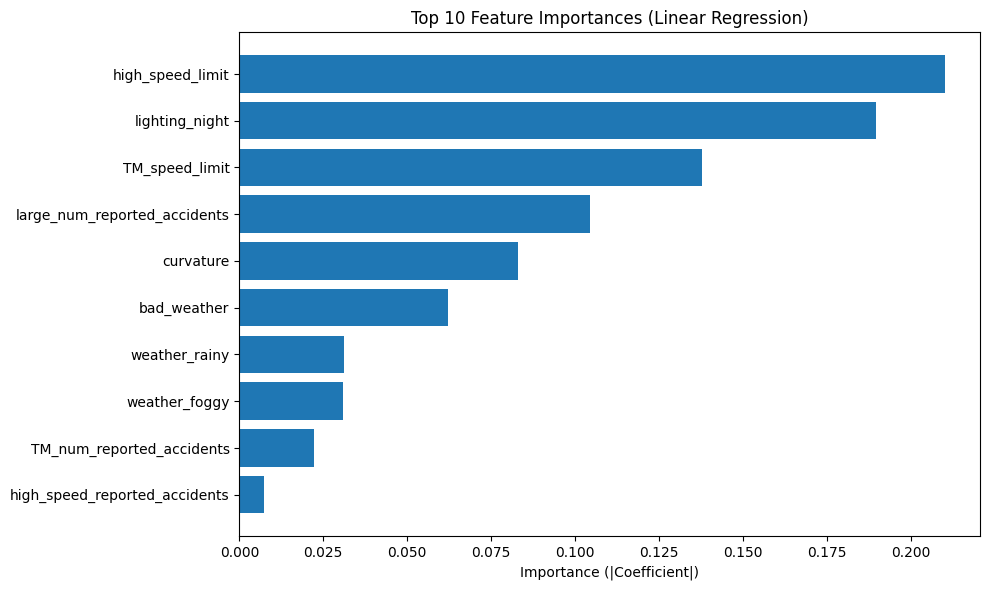

In [79]:
# --- 1. Обычная линейная регрессия ---
model_lin_imp = LinearRegression()
model_lin_imp.fit(X_important, y)

# 1. Получаем коэффициенты
# model_lin.coef_ - это numpy array с одним значением для каждого признака
coefficients = model_lin_imp.coef_

# 2. Получаем имена признаков (из датафрейма X_processed)
feature_names = X_important.columns

# 3. Вычисляем "важность" как абсолютное значение коэффициента
importance = np.abs(coefficients)

# 4. Создаём датафрейм для удобства отображения и анализа
importance_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients, # Полезно для понимания направления влияния
    'importance': importance
}).sort_values(by='importance', ascending=False, key=abs) # Сортировка по абсолютному значению

# 5. Выводим результат
print("Важность признаков (LinearRegression):")
print(importance_df)

# (Опционально) Визуализация топ-10 самых важных признаков
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xlabel('Importance (|Coefficient|)')
plt.title('Top 10 Feature Importances (Linear Regression)')
plt.gca().invert_yaxis()  # Чтобы самый важный был сверху
plt.tight_layout()
plt.show()

In [80]:
lin_imp_predict = model_lin_imp.predict(X_processed_t[important_feature_names])
lin_imp_predict

array([0.30364666, 0.11511816, 0.1907319 , ..., 0.24124508, 0.13035215,
       0.48532472])

In [81]:
score = (model_lin_imp.coef_ @ X_important.T) + model_lin_imp.intercept_
print(y.mean())
print(score.mean())
print(model_lin_imp.intercept_)

0.3523774031683
0.3523774031683
0.20693657895795223


In [82]:
# --- 1. Обычная линейная регрессия ---
model_lin = LinearRegression()
model_lin.fit(X_train[important_feature_names], y_train)
y_pred_lin = model_lin.predict(X_test[important_feature_names])
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.5f}, R²: {r2_lin:.5f}")
print(model_lin.coef_)

Linear Regression MSE: 0.00339, R²: 0.87718
[-0.13417612  0.20958551  0.18971235  0.10363005  0.08304871  0.06204785
  0.03122957  0.03081829 -0.01744949 -0.00737136]


In [ ]:
sns.histplot(score, kde = True, bins = 50)

In [ ]:
sns.histplot(y, kde = True, bins = 50)

In [83]:
X_processed['score'] = score

In [84]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, shuffle=True
)

In [107]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42        # Для воспроизводимости
)

model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003185
RMSE: 0.0564


In [119]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=450,
    # colsample_bytree=0.8,
    learning_rate=0.04,     # Скорость обучения
    max_depth=6,           # Максимальная глубина дерева
    # subsample=0.8,
    random_state=42,        # Для воспроизводимости
#     reg_alpha=1,      # L1 регуляризация
#     reg_lambda=1,     # L2 регуляризация
#     gamma=0.1        # минимальное улучшение для разбиения
)

model_XGB.fit(X_train.drop('score', axis=1), y_train)
y_pred_XGB = model_XGB.predict(X_test.drop('score', axis=1))
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003167
RMSE: 0.0563


In [124]:
from sklearn.inspection import permutation_importance

print("Вычисление пермутационной важности...")
perm_importance = permutation_importance(
    model_XGB,
    X_test.drop('score', axis=1),
    y_test,
    n_repeats=5,
    random_state=42,
    scoring='neg_mean_squared_error'  # чем выше, тем лучше
)

# Имена признаков
feature_names = X_test.drop('score', axis=1).columns

# DataFrame с важностью
perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values(by='importance', ascending=False)

perm_df

# # Покажем топ-15
# print("\nТоп-15 признаков по пермутационной важности:")
# print(perm_df.head(35))

Вычисление пермутационной важности...


,feature,importance,std
17,lighting_night,1.204511e-02,2.612061e-05
2,speed_limit^2,6.274976e-03,1.493002e-05
11,curvature speed_limit,5.332410e-03,3.987756e-05
4,curvature,4.857773e-03,4.530078e-05
26,bad_weather,3.507224e-03,1.774513e-05
32,high_speed_curvature,1.259037e-03,1.793562e-05
31,high_speed_night,7.142589e-04,9.596712e-06
3,curvature num_reported_accidents,5.445580e-04,4.484681e-06
0,num_reported_accidents^2,3.033748e-04,7.009431e-06
36,TM_num_reported_accidents,1.398163e-04,2.745988e-06


In [129]:
selected_features = perm_df[perm_df['importance'] > 0]['feature'].tolist()
len(selected_features)

29

In [130]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=450,
    # colsample_bytree=0.8,
    learning_rate=0.04,     # Скорость обучения
    max_depth=6,           # Максимальная глубина дерева
    # subsample=0.8,
    random_state=42,        # Для воспроизводимости
#     reg_alpha=1,      # L1 регуляризация
#     reg_lambda=1,     # L2 регуляризация
#     gamma=0.1        # минимальное улучшение для разбиения
)

model_XGB.fit(X_train[selected_features], y_train)
y_pred_XGB = model_XGB.predict(X_test[selected_features])
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003168
RMSE: 0.0563


In [132]:
from sklearn.inspection import permutation_importance

print("Вычисление пермутационной важности...")
perm_importance = permutation_importance(
    model_XGB,
    X_test[selected_features],
    y_test,
    n_repeats=5,
    random_state=42,
    scoring='neg_mean_squared_error'  # чем выше, тем лучше
)

# Имена признаков
feature_names = selected_features

# DataFrame с важностью
perm_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values(by='importance', ascending=False).round(4)

perm_df

# # Покажем топ-15
# print("\nТоп-15 признаков по пермутационной важности:")
# print(perm_df.head(35))

Вычисление пермутационной важности...


,feature,importance,std
0,lighting_night,0.0121,0.0
1,speed_limit^2,0.0063,0.0
2,curvature speed_limit,0.0056,0.0
3,curvature,0.0052,0.0
4,bad_weather,0.0035,0.0
5,high_speed_curvature,0.0013,0.0
6,high_speed_night,0.0007,0.0
7,curvature num_reported_accidents,0.0005,0.0
8,num_reported_accidents^2,0.0003,0.0
9,TM_num_reported_accidents,0.0001,0.0


In [133]:
print("Статистика y_train:")
print(y_train.describe())
print("\nСтатистика y_test:")
print(y_test.describe())

# Проверьте дисперсию
print(f"\nДисперсия y: {y_train.var():.6f}")

Статистика y_train:
count    414203.000000
mean          0.352605
std           0.166478
min           0.000000
25%           0.230000
50%           0.340000
75%           0.460000
max           1.000000
Name: accident_risk, dtype: float64

Статистика y_test:
count    103551.000000
mean          0.351466
std           0.166170
min           0.000000
25%           0.230000
50%           0.340000
75%           0.450000
max           1.000000
Name: accident_risk, dtype: float64

Дисперсия y: 0.027715


In [136]:
# Выберите только объекты с высоким риском
mask_high = y_test > 0.8
X_test_high = X_test[selected_features].loc[mask_high]
y_test_high = y_test.loc[mask_high]

# Пермутационная важность на этой подвыборке
perm_high = permutation_importance(
    model_XGB,
    X_test_high,
    y_test_high,
    n_repeats=5,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Создайте DataFrame
perm_df_high = pd.DataFrame({
    'feature': X_test_high.columns,
    'importance': perm_high.importances_mean
}).sort_values(by='importance', ascending=False).round(4)

# print(perm_df_high.head(10))
perm_df

,feature,importance,std
0,lighting_night,0.0121,0.0
1,speed_limit^2,0.0063,0.0
2,curvature speed_limit,0.0056,0.0
3,curvature,0.0052,0.0
4,bad_weather,0.0035,0.0
5,high_speed_curvature,0.0013,0.0
6,high_speed_night,0.0007,0.0
7,curvature num_reported_accidents,0.0005,0.0
8,num_reported_accidents^2,0.0003,0.0
9,TM_num_reported_accidents,0.0001,0.0


In [145]:
selected_features_min = [
    'lighting_night',
    'speed_limit^2',
    'curvature speed_limit',
    'curvature',
    'bad_weather',
    'high_speed_curvature',      # 0.0013 — оставить на всякий случай
    'high_speed_night',           # 0.0007 — можно убрать, но пусть будет
    'curvature num_reported_accidents',
    'num_reported_accidents^2',
    'TM_num_reported_accidents',
    'num_lanes curvature'
]

In [148]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=450,
    learning_rate=0.04,     # Скорость обучения
    max_depth=6,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
)

model_XGB.fit(X_train[selected_features_min], y_train)
y_pred_XGB = model_XGB.predict(X_test[selected_features_min])
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003189
RMSE: 0.0565


In [150]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=250,
    learning_rate=0.01,     # Скорость обучения
    max_depth=5,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
)

model_XGB.fit(X_train[selected_features_min], y_train)
y_pred_XGB = model_XGB.predict(X_test[selected_features_min])
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003189
RMSE: 0.0565


In [152]:
# mask = y_test > 0.8
# if mask.sum() > 0:
#     mse_high = mean_squared_error(y_test[mask], y_pred_XGB[mask])
#     priimport numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Убедитесь, что 'score' удалён (если нужно)
X_train_clean = X_train[selected_features_min].copy()
X_test_clean = X_test[selected_features_min].copy()

# Разделим обучающую выборку на train + validation для early stopping
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_clean, y_train, test_size=0.2, random_state=42
)

# Словарь гиперпараметров для поиска
param_dist = {
    'n_estimators': [200,300, 500, 800, 1000],          # будет ограничено early stopping
    'learning_rate': [0.01, 0.02, 0.03, 0.05],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],               # L1 регуляризация
    'reg_lambda': [0, 0.1, 1.0, 2.0],              # L2 регуляризация
    'gamma': [0, 0.1, 0.2, 0.5]                    # минимальное улучшение для разбиения
}

# Создаём модель с early stopping
xgb_model = XGBRegressor(
    random_state=42,
    verbosity=0,
    early_stopping_rounds=30  # будет использоваться внутри fit
)

# RandomizedSearchCV
print("Запуск RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,                 # количество комбинаций для проверки
    scoring='neg_mean_squared_error',
    cv=3,                      # 3-кратная кросс-валидация
    random_state=42,
    n_jobs=-1,                 # использовать все ядра
    verbose=1
)

# Обучение с кросс-валидацией
random_search.fit(
    X_train_sub,
    y_train_sub,
    eval_set=[(X_val, y_val)],
    verbose=False
)

# Лучшая модель
best_model = random_search.best_estimator_
print("\nЛучшие параметры:")
print(random_search.best_params_)

# Оценка на тесте
y_pred_best = best_model.predict(X_test_clean)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
print(f"\nРезультаты на тесте:")
print(f"MSE: {mse_best:.6f}")
print(f"RMSE: {rmse_best:.4f}")

# # Сравнение с исходной моделью
# print(f"\nБыло (исходная модель): MSE = {mse_XGB:.6f}, RMSE = {rmse:.4f}")
# print(f"Стало (после подбора):  MSE = {mse_best:.6f}, RMSE = {rmse_best:.4f}")nt("MSE (y > 0.8):", mse_high)
#     rmse = np.sqrt(mse_high)
#     print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

Запуск RandomizedSearchCV...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

Лучшие параметры:
{'subsample': 1.0, 'reg_lambda': 2.0, 'reg_alpha': 0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.6}

Результаты на тесте:
MSE: 0.003189
RMSE: 0.0565


In [160]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=800,
    learning_rate=0.03,     # Скорость обучения
    max_depth=7,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
    subsample = 1.0,
    reg_lambda = 2.0,
    reg_alpha = 0,
    gamma = 0,
    colsample_bytree = 0.6
)

model_XGB.fit(X_train[selected_features_min], y_train)
y_pred_XGB = model_XGB.predict(X_test[selected_features_min])
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003186
RMSE: 0.0564


In [177]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=800,
    learning_rate=0.02,     # Скорость обучения
    max_depth=7,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
    subsample = 1.0,
    reg_lambda = 2.0,
    reg_alpha = 0,
    gamma = 0,
    colsample_bytree = 0.7
)

model_XGB.fit(X_train[selected_features_min], y_train)
y_pred_XGB = model_XGB.predict(X_test[selected_features_min])
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003183
RMSE: 0.0564


In [169]:
selected_features_min

['lighting_night',
 'speed_limit^2',
 'curvature speed_limit',
 'curvature',
 'bad_weather',
 'high_speed_curvature',
 'high_speed_night',
 'curvature num_reported_accidents',
 'num_reported_accidents^2',
 'TM_num_reported_accidents',
 'num_lanes curvature']

In [90]:
X_train.columns

Index(['num_reported_accidents^2', 'speed_limit num_reported_accidents',
       'speed_limit^2', 'curvature num_reported_accidents', 'curvature',
       'num_lanes', 'speed_limit', 'num_reported_accidents',
       'num_lanes speed_limit', 'num_lanes num_reported_accidents',
       'curvature^2', 'curvature speed_limit', 'num_lanes^2',
       'num_lanes curvature', 'road_type_rural', 'road_type_urban',
       'lighting_dim', 'lighting_night', 'weather_foggy', 'weather_rainy',
       'time_of_day_evening', 'time_of_day_morning', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'bad_weather',
       'bad_visivility', 'large_num_reported_accidents', 'strong_curvature',
       'high_speed_limit', 'high_speed_night', 'high_speed_curvature',
       'strong_curvature_night', 'high_speed_reported_accidents',
       'TM_speed_limit', 'TM_num_reported_accidents', 'score'],
      dtype='object')

In [86]:
score_t = (model_lin_imp.coef_ @ X_processed_t[important_feature_names].T) + model_lin_imp.intercept_
X_processed_t['score'] = score_t

In [87]:
X_processed_t

,num_reported_accidents^2,speed_limit num_reported_accidents,speed_limit^2,curvature num_reported_accidents,curvature,num_lanes,speed_limit,num_reported_accidents,num_lanes speed_limit,num_lanes num_reported_accidents,...,large_num_reported_accidents,strong_curvature,high_speed_limit,high_speed_night,high_speed_curvature,strong_curvature_night,high_speed_reported_accidents,TM_speed_limit,TM_num_reported_accidents,score
0,-0.462347,-0.208526,-0.231474,-0.404435,-0.545632,-0.438680,-0.070467,-0.209797,-0.370004,-0.346572,...,0,0,0,0.0,0,0.0,0,0.292802,0.330684,0.303647
1,-0.843188,-1.126322,-0.231474,-0.902649,-1.646295,0.453832,-0.070467,-1.325918,0.298379,-1.055621,...,0,0,0,0.0,0,0.0,0,0.292802,0.338785,0.115118
2,-0.462347,-0.412481,-0.759581,-0.038101,0.371587,-0.438680,-0.703840,-0.209797,-0.667064,-0.346572,...,0,1,0,0.0,0,0.0,0,0.287870,0.330684,0.190732
3,0.680175,0.301361,-0.759581,1.881488,1.692382,1.346344,-0.703840,0.906324,0.372644,1.780573,...,0,1,0,0.0,0,0.0,0,0.287870,0.342967,0.393456
4,2.584379,1.015203,-0.759581,2.877915,1.362183,-0.438680,-0.703840,2.022445,-0.667064,1.071524,...,1,1,0,0.0,0,0.0,0,0.287870,0.550093,0.372615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172580,0.680175,0.709270,-0.231474,-0.873342,-1.756362,-0.438680,-0.070467,0.906324,-0.370004,0.362476,...,0,0,0,0.0,0,0.0,0,0.292802,0.342967,0.106377
172581,0.680175,1.729044,1.666411,1.266047,0.921918,-1.331192,1.512963,0.906324,-0.667064,-0.346572,...,0,1,1,0.0,1,0.0,0,0.451436,0.342967,0.516601
172582,-0.462347,0.301361,1.666411,-0.697502,-1.279408,-0.438680,1.512963,-0.209797,0.372644,-0.346572,...,0,0,1,0.0,0,0.0,0,0.451436,0.330684,0.241245
172583,-0.843188,-1.126322,-0.231474,-0.902649,-1.462852,-1.331192,-0.070467,-1.325918,-1.038388,-1.055621,...,0,0,0,0.0,0,0.0,0,0.292802,0.338785,0.130352


In [89]:
model_XGB.fit(X_processed, y)

y_final = model_XGB.predict(X_processed_t)

results_df = pd.DataFrame({
    'id': test_df['id'].values,
    'accident_risk': y_final
})

# Проверим первые строки
print(results_df.head())

# Сохраняем в CSV файл
results_df.to_csv('XGB_lin_submission.csv', index=False)

KeyboardInterrupt: 

In [ ]:
round(results_df['accident_risk'], 2)

# Тестирование линейной модели

In [ ]:
imp_feature_names = [
    'TM_speed_limit',                 # -0.236
    'high_speed_limit',               #  0.224
    'lighting_night',                 #  0.185
    'large_num_reported_accidents',   #  0.097
    'curvature',                      #  0.079/
    'bad_weather',                    #  0.060
    'weather_rainy',                  #  0.031
    'weather_foggy',                  #  0.030
    # 'TM_num_reported_accidents',   #  0.010 - опционально
    # 'high_speed_reported_accidents', # -0.009 - опционально
    # и т.д., если вы хотите включить чуть больше
]
X_important_testing = X_processed[imp_feature_names]

In [ ]:
# --- 1. Обычная линейная регрессия ---
model_lin_testing = LinearRegression()
model_lin_testing.fit(X_train[imp_feature_names], y_train)
y_pred_lin = model_lin_testing.predict(X_test[imp_feature_names])
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin:.5f}, R²: {r2_lin:.5f}")

In [ ]:
sns.histplot(y, kde = True, bins = 50)

In [ ]:
sns.histplot(y_pred_lin, kde = True, bins = 50)

In [ ]:
import pandas as pd
import numpy as np


print("--- Базовая статистика ---")
print(y.describe()) # count, mean, std, min, 25%, 50% (median), 75%, max
print("\nМинимум:", y.min())
print("Максимум:", y.max())
print("Среднее:", y.mean())
print("Медиана:", y.median())
print("Стандартное отклонение:", y.std())
print("Количество уникальных значений:", y.nunique())

In [ ]:
import pandas as pd
import numpy as np

y_final = results_df['accident_risk']
print("--- Базовая статистика ---")
print(y_final.describe()) # count, mean, std, min, 25%, 50% (median), 75%, max
print("\nМинимум:", y_final.min())
print("Максимум:", y_final.max())
print("Среднее:", y_final.mean())
print("Медиана:", y_final.median())
print("Стандартное отклонение:", y_final.std())
print("Количество уникальных значений:", y_final.nunique())

In [180]:
import pandas as pd
import numpy as np

# Предположим, у вас есть:
# y_test: pd.Series или np.array - истинные значения accident_risk для X_test
# y_pred: pd.Series или np.array - предсказания модели для X_test
# X_test: pd.DataFrame или np.array - тестовые признаки

# 1. Вычисляем остатки
residuals = np.abs(y_test - y_pred_XGB)

# 2. Определяем "плохо предсказанные" объекты
# Например, y_true > 0.8 и разница (y_true - y_pred) > 0.3
# (настройте пороги под вашу задачу)
threshold_true = 0.9
threshold_error = 0.1

badly_predicted_mask = (y_test > threshold_true) & (residuals > threshold_error)

# 3. Выбираем признаки и целевые значения для этих объектов
X_test_bad = X_test[selected_features_min][badly_predicted_mask]
y_test_bad = y_test[badly_predicted_mask]
y_pred_bad = y_pred_XGB[badly_predicted_mask]
residuals_bad = residuals[badly_predicted_mask]

print(f"Найдено {len(X_test_bad)} объектов, где y_true > {threshold_true} и ошибка > {threshold_error}")

if len(X_test_bad) > 0:
    # 4. Анализ признаков
    print("\n--- Статистика по признакам для плохо предсказанных объектов ---")
    # Показывает среднее значение признака для "плохо предсказанных" объектов
    # Это может выявить, какие признаки отличаются от "обычных"
    print(X_test_bad.describe())

    print("\n--- Средние значения признаков (по столбцам) ---")
    print(X_test_bad.mean())

    # # 5. Сравнение с "обычными" объектами (например, с y_true < 0.2)
    # normal_mask = y_test < 0.2
    # if normal_mask.any():
    #     X_test_normal = X_test[normal_mask]
    #     print("\n--- Средние значения признаков для 'обычных' объектов (y_true < 0.2) ---")
    #     print(X_test_normal.mean())

    # 6. Сравнение с "хорошо предсказанными" высокими значениями (например, |y_true - y_pred| < 0.05 и y_true > 0.8)
    well_predicted_high_mask = (y_test > threshold_true) & (abs(residuals) < 0.05)
    if well_predicted_high_mask.any():
        X_test_well = X_test[selected_features_min][well_predicted_high_mask]
        print("\n--- Средние значения признаков для 'хорошо предсказанных' высоких рисков ---")
        print(X_test_well.mean())

    # 7. (Опционально) Визуализация (например, гистограммы ключевых признаков)
    # for col in X_test_bad.columns[:5]: # первые 5 признаков для примера
    #     plt.figure()
    #     plt.hist(X_test_bad[col], alpha=0.5, label='Bad Pred', bins=20)
    #     plt.hist(X_test_normal[col], alpha=0.5, label='Normal', bins=20)
    #     plt.title(f'Distribution of {col}')
    #     plt.legend()
    #     plt.show()

else:
    print("Не найдено объектов, удовлетворяющих критериям плохо предсказанного высокого риска.")
    # Возможно, модель уже достаточно хорошо справляется или пороги нужно изменить

Найдено 41 объектов, где y_true > 0.9 и ошибка > 0.1

--- Статистика по признакам для плохо предсказанных объектов ---
       lighting_night  speed_limit^2  curvature speed_limit  curvature  \
count       41.000000      41.000000              41.000000  41.000000   
mean         0.829268       0.913295               0.939721   0.428857   
std          0.380949       0.854642               1.308639   1.092994   
min          0.000000      -1.155661              -1.429544  -1.756362   
25%          1.000000       0.808237              -0.180366  -0.472255   
50%          1.000000       0.808237               1.309539   0.628408   
75%          1.000000       1.666411               1.947141   1.325495   
max          1.000000       1.666411               2.994629   1.802449   

       bad_weather  high_speed_curvature  high_speed_night  \
count    41.000000             41.000000         41.000000   
mean      0.829268              0.658537          0.780488   
std       0.380949          

In [213]:
X_train_new = X_train[selected_features_min].copy()
X_test_new = X_test[selected_features_min].copy()

In [214]:
# Бинарные признаки риска
risk_conditions = [
    'lighting_night',
    'bad_weather',
    'high_speed_night',
    'high_speed_curvature'
    # 'strong_curvature',          # если есть
    # 'large_num_reported_accidents'
]

# # Нормализуем важные непрерывные признаки (если не нормализованы)
# X_train_new['aggregated_risk_score'] = (
#     X_train_new['curvature'].clip(lower=0) +
#     X_train_new['num_reported_accidents'].clip(lower=0) +
#     X_train_new['speed_limit'].clip(lower=0) +
#     X_train_new['TM_num_reported_accidents']
# )

X_train_new['high_risk_combo'] = (
    (X_train_new['lighting_night'] >= 0.5) &
    (X_train_new['bad_weather'] >= 0.5) &
    (X_train_new['curvature'] >= 0.3)  # порог подберите по данным
).astype(int)

X_train_new['combo_score'] = (
    X_train_new['lighting_night'] * 0.3 +
    X_train_new['bad_weather'] * 0.3 +
    X_train_new['curvature'].clip(0, 2) * 0.4  # веса можно настроить
)

X_train_new['total_risk_conditions'] = X_train_new[risk_conditions].sum(axis=1)
# # Пример: используем статистики из «хороших» объектов как reference
# ideal_curvature = 1.51
# ideal_accidents_sq = 6.39

# X_train_new['curvature_ratio'] = X_train_new['curvature'] / ideal_curvature
# X_train_new['accidents_ratio'] = X_train_new['num_reported_accidents^2'] / ideal_accidents_sq

# # Или общий индекс близости
# X_train_new['proximity_to_ideal'] = (
#     X_train_new['curvature_ratio'] +
#     X_train_new['accidents_ratio'] +
#     X_train_new['lighting_night'] +
#     X_train_new['bad_weather']
# ) / 4


# # Нормализуем важные непрерывные признаки (если не нормализованы)
# X_test_new['aggregated_risk_score'] = (
#     X_test_new['curvature'].clip(lower=0) +
#     X_test_new['num_reported_accidents'].clip(lower=0) +
#     X_test_new['speed_limit'].clip(lower=0) +
#     X_test_new['TM_num_reported_accidents']
# )

X_test_new['high_risk_combo'] = (
    (X_test_new['lighting_night'] >= 0.5) &
    (X_test_new['bad_weather'] >= 0.5) &
    (X_test_new['curvature'] >= 0.3)  # порог подберите по данным
).astype(int)

X_test_new['combo_score'] = (
    X_test_new['lighting_night'] * 0.3 +
    X_test_new['bad_weather'] * 0.3 +
    X_test_new['curvature'].clip(0, 2) * 0.4  # веса можно настроить
)
X_test_new['total_risk_conditions'] = X_test_new[risk_conditions].sum(axis=1)
# # Пример: используем статистики из «хороших» объектов как reference
# ideal_curvature = 1.51
# ideal_accidents_sq = 6.39

# X_test_new['curvature_ratio'] = X_test_new['curvature'] / ideal_curvature
# X_test_new['accidents_ratio'] = X_test_new['num_reported_accidents^2'] / ideal_accidents_sq

# # Или общий индекс близости
# X_test_new['proximity_to_ideal'] = (
#     X_test_new['curvature_ratio'] +
#     X_test_new['accidents_ratio'] +
#     X_test_new['lighting_night'] +
#     X_test_new['bad_weather']
# ) / 4


In [215]:
# Параметры модели (можно настраивать для улучшения качества)
model_XGB = XGBRegressor(
    n_estimators=800,
    learning_rate=0.02,     # Скорость обучения
    max_depth=7,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
    subsample = 1.0,
    reg_lambda = 2.0,
    reg_alpha = 0,
    gamma = 0,
    colsample_bytree = 0.7
)

model_XGB.fit(X_train_new, y_train)
y_pred_XGB = model_XGB.predict(X_test_new)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003180
RMSE: 0.0564


In [229]:
from sklearn.model_selection import cross_val_predict
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Параметры модели
model_XGB = XGBRegressor(
    n_estimators=800,
    learning_rate=0.02,
    max_depth=7,
    random_state=42,
    subsample=1.0,
    reg_lambda=2.0,
    reg_alpha=0,
    gamma=0,
    colsample_bytree=0.7,
    verbosity=0
)

# Обучение модели
model_XGB.fit(X_train_new, y_train)

# Предсказания на тесте
y_pred_XGB = model_XGB.predict(X_test_new)

# === КАЛИБРОВКА ТОЛЬКО ДЛЯ ВЫСОКИХ ПРЕДСКАЗАНИЙ (ŷ > 0.5) ===

# 1. Получаем ЧЕСТНЫЕ предсказания на train (через кросс-валидацию)
print("Получение кросс-валидационных предсказаний на train...")
y_pred_train = cross_val_predict(model_XGB, X_train_new, y_train, cv=5)

# 2. Обучаем IsotonicRegression ТОЛЬКО на объектах с ŷ > 0.5
mask_calib = y_pred_train > 0.5

if mask_calib.sum() > 10:  # убедимся, что есть достаточно данных
    iso_reg = IsotonicRegression(out_of_bounds='clip')
    iso_reg.fit(y_pred_train[mask_calib], y_train[mask_calib])

    # 3. Применяем калибровку ТОЛЬКО к тестовым предсказаниям с ŷ > 0.5
    y_pred_calibrated = y_pred_XGB.copy()
    mask_apply = y_pred_XGB > 0.5
    if mask_apply.sum() > 0:
        y_pred_calibrated[mask_apply] = iso_reg.predict(y_pred_XGB[mask_apply])
else:
    print("Недостаточно объектов с ŷ > 0.5 для калибровки. Используем исходные предсказания.")
    y_pred_calibrated = y_pred_XGB

# === ОЦЕНКА ===
mse_original = mean_squared_error(y_test, y_pred_XGB)
rmse_original = np.sqrt(mse_original)

mse_calibrated = mean_squared_error(y_test, y_pred_calibrated)
rmse_calibrated = np.sqrt(mse_calibrated)

print(f"\nИсходная модель:")
print(f"MSE: {mse_original:.6f}, RMSE: {rmse_original:.4f}")

print(f"\nПосле калибровки (только ŷ > 0.5):")
print(f"MSE: {mse_calibrated:.6f}, RMSE: {rmse_calibrated:.4f}")

# === Оценка на критической подвыборке (y_true > 0.8) ===
mask_high = y_test > 0.8
if mask_high.sum() > 0:
    mse_high_orig = mean_squared_error(y_test[mask_high], y_pred_XGB[mask_high])
    mse_high_cal = mean_squared_error(y_test[mask_high], y_pred_calibrated[mask_high])

    print(f"\nНа объектах с y_true > 0.8:")
    print(f"  Исходная MSE:     {mse_high_orig:.6f}")
    print(f"  Калиброванная MSE: {mse_high_cal:.6f}")

    # Считаем, сколько объектов с ошибкой > 0.3
    large_errors_orig = np.abs(y_test[mask_high] - y_pred_XGB[mask_high]) > 0.3
    large_errors_cal = np.abs(y_test[mask_high] - y_pred_calibrated[mask_high]) > 0.3

    print(f"  Объектов с ошибкой > 0.3: было {large_errors_orig.sum()}, стало {large_errors_cal.sum()}")

Получение кросс-валидационных предсказаний на train...

Исходная модель:
MSE: 0.003180, RMSE: 0.0564

После калибровки (только ŷ > 0.5):
MSE: 0.003181, RMSE: 0.0564

На объектах с y_true > 0.8:
  Исходная MSE:     0.013967
  Калиброванная MSE: 0.014008
  Объектов с ошибкой > 0.3: было 14, стало 14


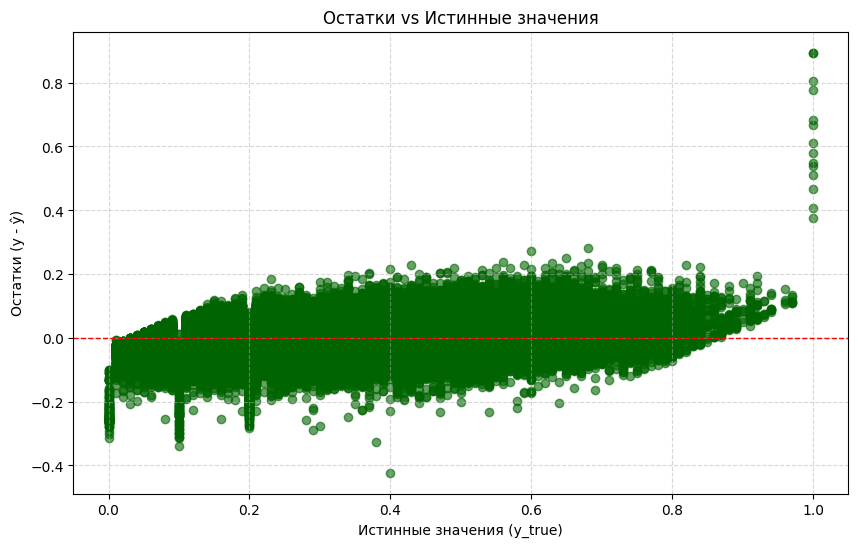

In [216]:
residuals = y_test - y_pred_XGB
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [237]:
# Вес = 10 для y > 0.8, 3 для y > 0.6, 1 для остальных
sample_weights = np.ones(len(y_train))
sample_weights[y_train > 0.8] = 10
# sample_weights[(y_train > 0.6) & (y_train <= 0.8)] = 2

model_weighted = XGBRegressor(
    n_estimators=800,
    learning_rate=0.02,     # Скорость обучения
    max_depth=7,           # Максимальная глубина дерева
    random_state=42,        # Для воспроизводимости
    subsample = 1.0,
    reg_lambda = 2.0,
    reg_alpha = 0,
    gamma = 0,
    colsample_bytree = 0.7
)
model_weighted.fit(X_train_new, y_train, sample_weight=sample_weights)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [238]:
y_pred_XGB = model_weighted.predict(X_test_new)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse_XGB)
print(f"MSE: {mse_XGB:.6f}")
print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003260
RMSE: 0.0571


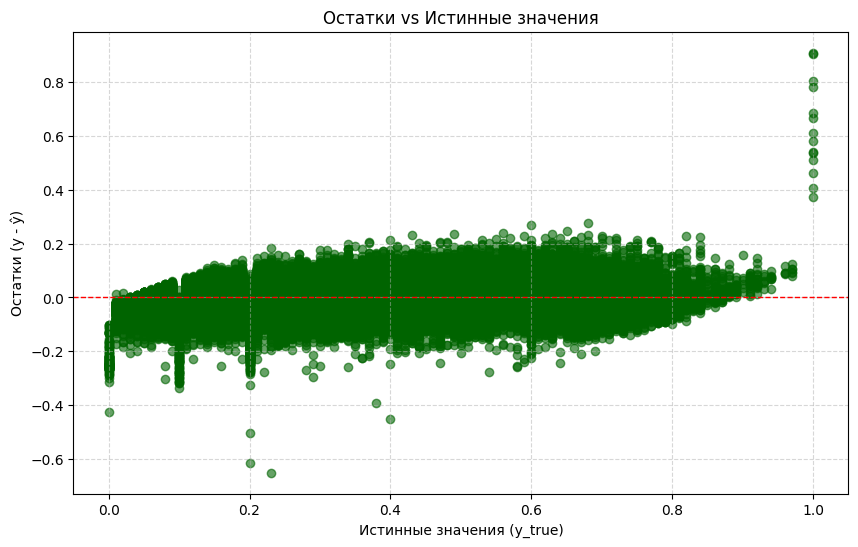

In [239]:
residuals = y_test - y_pred_XGB
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Берём только объекты с y_pred > 0.5
mask_calib = y_pred_XGB > 0.5
iso_reg = IsotonicRegression(out_of_bounds='clip')
iso_reg.fit(y_pred_XGB[mask_calib], y_train[mask_calib])

# Применяем только к высоким предсказаниям
y_pred_final = y_pred_test.copy()
mask_apply = y_pred_test > 0.5
y_pred_final[mask_apply] = iso_reg.predict(y_pred_test[mask_apply])

In [217]:
# from sklearn.model_selection import cross_val_predict
# from sklearn.isotonic import IsotonicRegression

# # Получаем честные предсказания на train (без утечки)
# y_pred_train = cross_val_predict(model_XGB, X_train_new, y_train, cv=5)

# # Теперь калибруем
# iso_reg = IsotonicRegression(out_of_bounds='clip')
# iso_reg.fit(y_pred_train, y_train)

# # Применяем к тесту
# y_pred_test = model_XGB.predict(X_test_new)
# y_pred_calibrated = iso_reg.predict(y_pred_test)

In [218]:
# mse_XGB = mean_squared_error(y_test, y_pred_calibrated)
# rmse = np.sqrt(mse_XGB)
# print(f"MSE: {mse_XGB:.6f}")
# print(f"RMSE: {rmse:.4f}")  # ← это средняя абсолютная ошибка в шкале y

MSE: 0.003181
RMSE: 0.0564


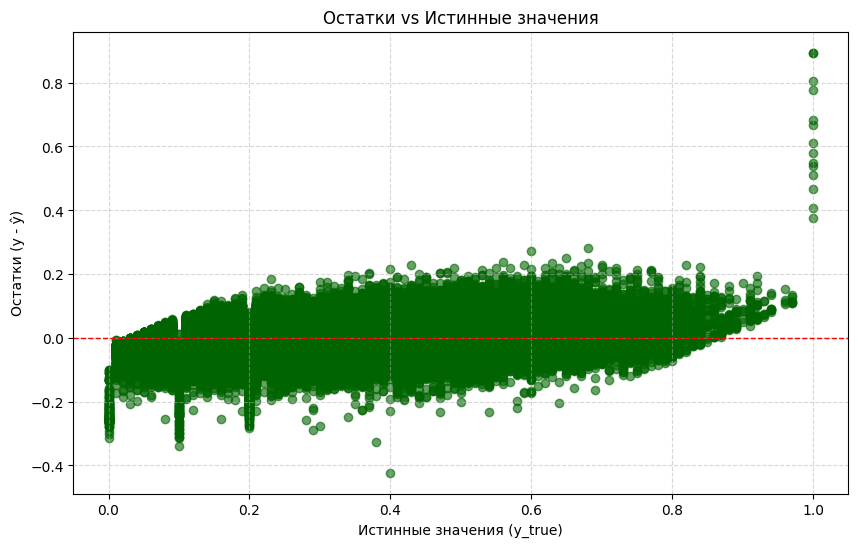

In [219]:
residuals = y_test - y_pred_XGB
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [208]:
# Выберите только объекты с высоким риском
mask_high = y_test > 0.8
X_test_high = X_test_new.loc[mask_high]
y_test_high = y_test.loc[mask_high]

# Пермутационная важность на этой подвыборке
perm_high = permutation_importance(
    model_XGB,
    X_test_high,
    y_test_high,
    n_repeats=10,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Создайте DataFrame
perm_df_high = pd.DataFrame({
    'feature': X_test_high.columns,
    'importance': perm_high.importances_mean
}).sort_values(by='importance', ascending=False).round(4)

# print(perm_df_high.head(10))
perm_df_high

,feature,importance
7,curvature num_reported_accidents,0.0005
8,num_reported_accidents^2,0.0004
16,proximity_to_ideal,0.0003
4,bad_weather,0.0001
9,TM_num_reported_accidents,0.0001
15,accidents_ratio,0.0000
10,num_lanes curvature,0.0000
11,high_risk_combo,-0.0000
6,high_speed_night,-0.0001
14,curvature_ratio,-0.0002


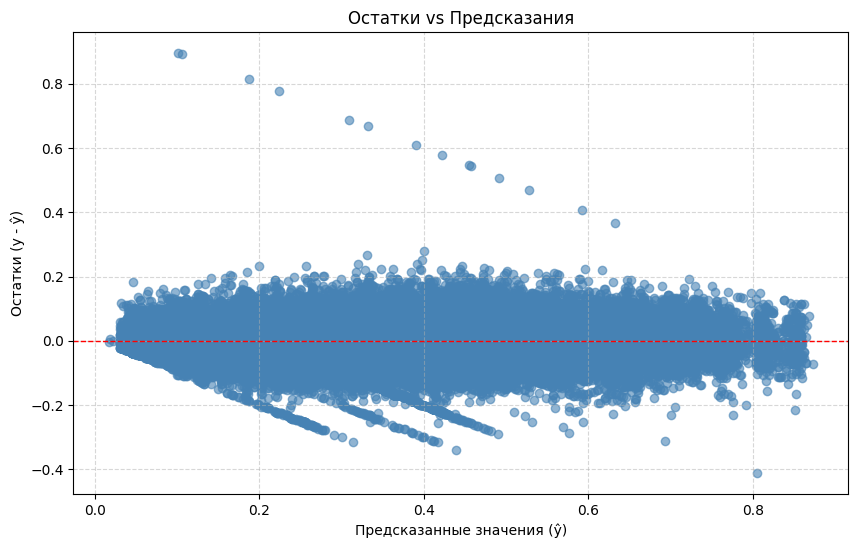

In [211]:
import matplotlib.pyplot as plt
import numpy as np

# Вычисляем остатки
residuals = y_test - y_pred_calibrated

# График: остатки vs предсказания
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_XGB, residuals, alpha=0.6, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Предсказанные значения (ŷ)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Предсказания')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

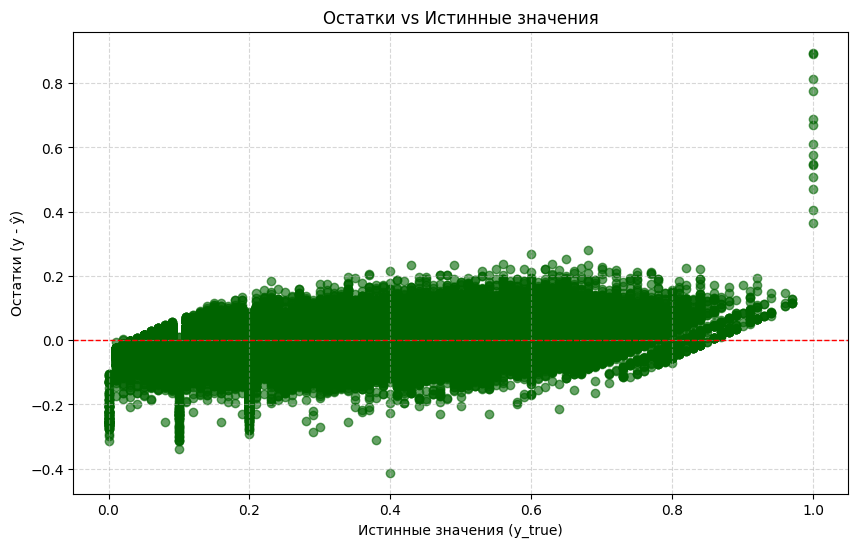

In [212]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

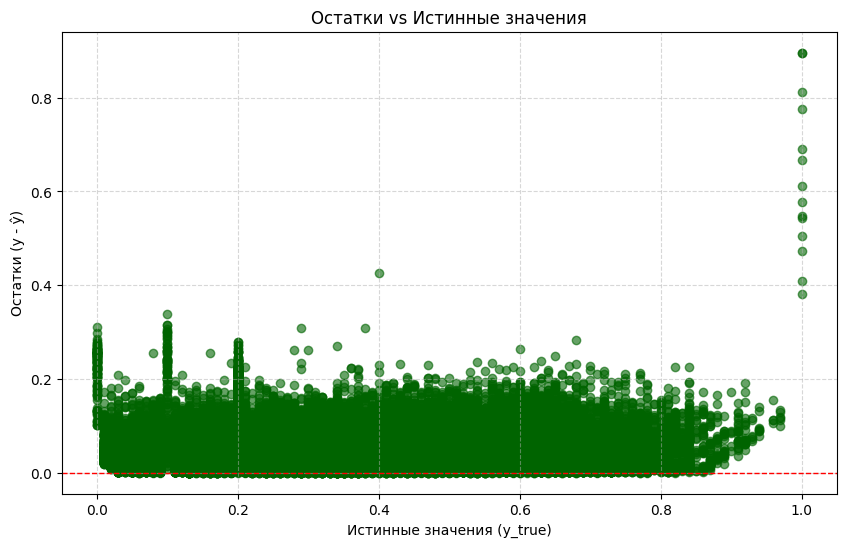

In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

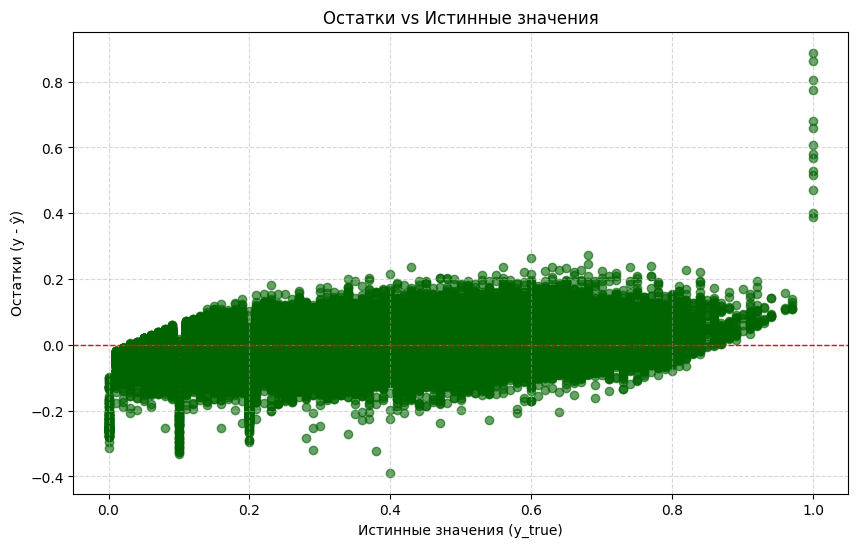

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Остатки (y - ŷ)')
plt.title('Остатки vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

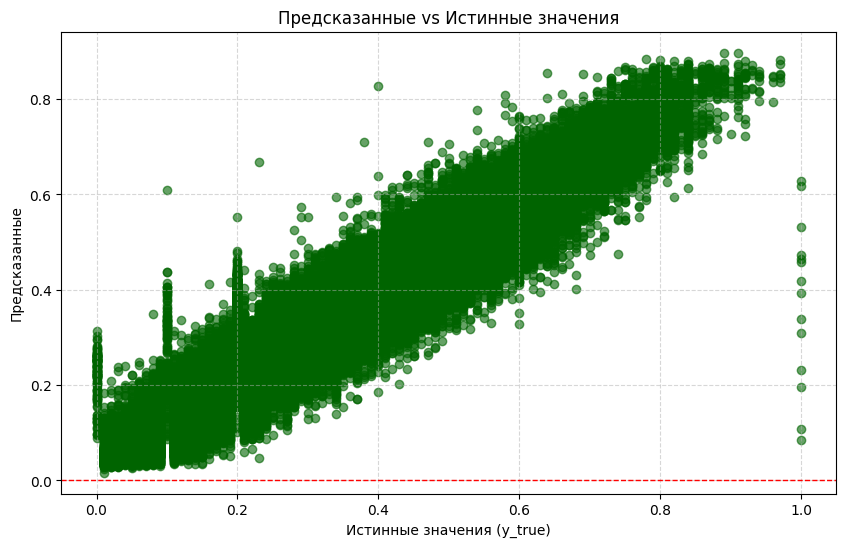

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_XGB, alpha=0.6, color='darkgreen')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Истинные значения (y_true)')
plt.ylabel('Предсказанные')
plt.title('Предсказанные vs Истинные значения')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [100]:
data[data['accident_risk'] == 1]

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
2601,rural,3,0.37,35,dim,rainy,1,0,evening,1,0,2,1.0
8897,rural,1,0.43,25,night,rainy,0,1,morning,1,1,1,1.0
10396,urban,2,0.01,60,night,foggy,0,1,afternoon,1,0,1,1.0
24483,highway,3,0.03,45,dim,foggy,0,1,morning,0,0,2,1.0
30043,rural,1,0.57,35,night,rainy,1,0,evening,0,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466705,urban,1,0.35,45,night,foggy,1,1,evening,1,0,0,1.0
468448,rural,3,0.25,70,night,rainy,1,1,evening,0,1,1,1.0
484631,highway,2,0.19,60,night,clear,1,1,afternoon,0,0,0,1.0
495325,urban,2,0.04,35,night,clear,1,0,morning,1,0,3,1.0


In [101]:
data[data['accident_risk'] == 0]

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
31,rural,1,0.01,60,dim,clear,0,0,evening,0,1,1,0.0
46,urban,1,0.01,35,night,clear,1,0,afternoon,1,0,0,0.0
932,urban,2,0.10,35,dim,rainy,0,0,evening,0,0,1,0.0
1122,rural,3,0.55,35,dim,clear,0,1,afternoon,0,0,0,0.0
1181,rural,4,0.82,25,dim,clear,0,1,afternoon,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515667,urban,2,0.07,35,night,clear,1,1,morning,0,1,1,0.0
516430,urban,1,0.26,25,daylight,foggy,0,0,morning,0,1,0,0.0
516526,urban,4,0.23,35,daylight,rainy,0,1,afternoon,1,1,1,0.0
516763,urban,1,0.07,25,night,clear,0,0,evening,0,0,2,0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

# Предположим, у вас есть:
# X_train, y_train, X_test, y_test

# --- Вариант A: Простое взвешивание по y_true ---
# sample_weight = y_train
# sample_weight = y_train ** 2 # Ещё сильнее акцент на высокие значения

# --- Вариант B: Взвешивание по "опасности" ---
# Создаём "ручной" вес на основе важных признаков, выявленных в анализе
# Чем выше вероятность "опасности", тем выше вес
# ВАЖНО: используем ТОЛЬКО признаки, доступные на момент обучения!

# Пример: высокий риск = high_speed_limit И (lighting_night ИЛИ bad_weather)
# Проверьте, есть ли такие столбцы в X_train. Используйте реальные имена!
dangerous_conditions = (
    X_train['high_speed_limit'] *  # предполагаем, это бинарный признак 0/1
    (X_train['lighting_night'] + X_train['bad_weather']) # 1 если хотя бы одно из них
).astype(bool).astype(int)

# Вес = 1.0 + (например, 5x штраф, если выполнены опасные условия)
sample_weight = 2.5 + 10.0 * dangerous_conditions

# --- Вариант C: Взвешивание по комбинации y_true и опасности ---
# sample_weight = (y_train ** 2) * (1.0 + 2.0 * dangerous_conditions)

# --- Выберите один из вариантов ---
# sample_weight = y_train # Пример: Взвешивание по квадрату y_true

# --- Обучение модели с весами ---
model_weighted = XGBRegressor( # или RandomForestRegressor(), GradientBoostingRegressor()
    n_estimators=200,
    colsample_bytree=0.8,
    learning_rate=0.05,     # Скорость обучения
    max_depth=10,           # Максимальная глубина дерева
    subsample=0.8,
    random_state=42
)

model_weighted.fit(X_train, y_train, sample_weight=sample_weight)

# --- Предсказание и оценка ---
y_pred_weighted = model_weighted.predict(X_test)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)

print(f"MSE с весами: {mse_weighted:.5f}")

# Сравните с MSE вашей лучшей модели без весов
print(f"MSE без весов: 0.003184979237374964")

In [ ]:
sorted(data['accident_risk'].unique())

In [ ]:
round(y_final, 2).unique()

In [ ]:
sns.histplot(round(y_final, 2), kde = True, bins = 50)

In [ ]:
sns.histplot(y, kde = True, bins = 50)

In [ ]:
import pandas as pd
import numpy as np

y_final = round(y_final, 2)
print("--- Базовая статистика ---")
print(y_final.describe()) # count, mean, std, min, 25%, 50% (median), 75%, max
print("\nМинимум:", y_final.min())
print("Максимум:", y_final.max())
print("Среднее:", y_final.mean())
print("Медиана:", y_final.median())
print("Стандартное отклонение:", y_final.std())
print("Количество уникальных значений:", y_final.nunique())

In [93]:
data

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,0,1,afternoon,0,1,1,0.13
1,urban,4,0.99,35,daylight,clear,1,0,evening,1,1,0,0.35
2,rural,4,0.63,70,dim,clear,0,1,morning,1,0,2,0.30
3,highway,4,0.07,35,dim,rainy,1,1,morning,0,0,1,0.21
4,rural,1,0.58,60,daylight,foggy,0,0,evening,1,0,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,highway,4,0.10,70,daylight,foggy,1,1,afternoon,0,0,2,0.32
517750,rural,4,0.47,35,daylight,rainy,1,1,morning,0,0,1,0.26
517751,urban,4,0.62,25,daylight,foggy,0,0,afternoon,0,1,0,0.19
517752,highway,3,0.63,25,night,clear,1,0,afternoon,1,1,3,0.51
